# **Forward-Forward Algorithm for Speech Processing**

## **Abstract**
This project investigates the effectiveness of the Forward-Forward algorithm, an alternative to backpropagation introduced by G. Hinton. Unlike traditional backpropagation, the Forward-Forward algorithm uses two forward passes, one with real data and the other with negative data. Each layer of the network has its own objective function designed to demonstrate high goodness on positive data and low goodness on negative data. Previous works have evaluated this method on image classification datasets using simple fully connected networks. In this work, we extend the Forward-Forward algorithm in other domains using more sophisticated model architectures. Specifically, we study the Forward-Forward algorithm in Audio and Speech classification tasks using Convolutional Neural Networks. Extensive experiments on Audio MNIST, RAVDESS, and Google Speech datasets show that the Forward-Forward algorithm can achieve comparable in-distribution performance to traditional backpropagation. More importantly, in transfer learning settings, the Forward-Forward algorithm has the potential to outperform normal training by a significant margin. These findings provide insight into the potential viability of the Forward-Forward algorithm in audio modality and transfer learning.

## **1) Introduction**

In the past ten years, thanks to the Stochastic Gradient Descent, deep learning has achieved remarkable success with a vast amount of data and parameters. In backpropagation, parameters are updated using the gradients computed through backpropagation. One of the significant drawbacks of backpropagation is that it is completely dependent on the computation information of the derivatives in the forward pass. When a black box is introduced into the forward pass, backpropagation becomes unfeasible unless a differentiable model of the black box is developed [1]. That's why in December 2022, Geoffrey Hinton introduced a proper alternative for Backpropagation called Forward-Forward algorithm that was a breakthrough in this field [2].

The Forward-Forward algorithm is a greedy multi-layer learning approach that is inspired by Boltzmann machines [3] and Noise Contrastive Estimation [4]. In this approach, the forward and backward passes of backpropagation are replaced with two forward passes that have the same operations but work on different data and have opposite objectives. The positive pass adjusts the weights to improve the goodness in every hidden layer using "positive data", while the negative pass adjusts the weights to reduce the goodness in every hidden layer using "negative data".

The Forward-Forward algorithm is somewhat slower that Backpropagation but their speed is comparable. One of the advantages of Forward-Forward algorithm is that it can be utilized even when the exact details of the forward computation are unknown. Moreover, it has the benefit of being able to learn while piplining sequential data through a neural network without having to store neural activities or pause to propagate error derivatives. One of the main drawback of this approach is that it cannot generalize very well on several of the toy problems investigated in this project. The Forward-Forward algorithm has potential superiority over backpropagation in two areas: as a model for learning in the cortex and as a means of utilizing low-power analog hardware without resorting to reinforcement learning.

In this project, the application and goodness of Forward-Forward algorithm is supposed to be investigated in the field of Speech Processing. All of the implementations are based on Convolutional Neural Networks (CNNs). Morover, the effectiveness of this approach in case of training a CNN model from scratch and training a CNN model using Transfer Learnign method is explored. It should be noted that, in this project differernt datasets with assorted number of samples are employed with the aim of demonstrating the effectiveness of this approach in the field of speech processing and considering various scenarios. Accordingly, three kinds of public datasets were employed named "Ausio MNIST", "Human Speech Emotion Classification", and "Google Speech Command".

There are several innovations in this project that were adopted in order to achieve promising results: 1) The way of generating the "Nagative Samples" 2) True labes were injected into the model, in the first layer of the Fully-Connected part of the CNN with the aim of preventing from forgetting the labels.

In the following, we will discuss more about our datasets, methods, and results. In the Section 2, the important steps have taken to achieve our goal is investigated. Then in the Section 3, A list of the machine learning techniques used to solve our problem are introduced and the corresponding hyperparameters are reported. Finally, in the Section 4 and 5, the obtained results are presented and analyzed and a short sumurization of the chosen approach is carried out.

## **2) Methodology**

Consider a network that consists of $k$ feed-forward layers with non-linearity activation functions such as ReLU. In normal supervised training, for an input image, an objective function (typically cross-entropy) is calculated on the outputs of the network and the ground truth label to measure the goodness of the network. This signal is then backpropagated throughout the network, and all layers are updated accordingly, to show a better goodness score.

The Forward-Forward algorithm eliminates the need for backpropagation by using two forward passes, namely, a positive pass and a negative pass. Consider an input image $I$ where the task is to classify it from $k$ target classes. In Forward-Forward, the first $k$ pixels of the first row of the image (top-left) is replaced with the one-hot encoding of a  label $0 <= L < k$. If the one-hot encoding $L$ corresponds to the ground-truth label if the input image $I$, the resulting image is considered a positive sample $I_P$, and if $L$ is different from the ground-truth label, the corresponding image is considered a negative sample $I_N$. For each batch of data, we will get one $I_P$ image, and we sample a single negative sample $I_N$ randomly. At step 0, the outputs of the first layer are calculated for the set of positive $I_P$ and negative $I_N$ samples. Let $g_{pos}$ and $g_{neg}$ represent the feature representations of this layer for a batch of data. The following objective function is then calculated as the loss:

    loss = torch.log(1 + torch.exp(torch.cat([
                    -g_pos.pow(2) + self.threshold,
                    g_neg.pow(2) - self.threshold]))).mean()

This loss function encourages the positive data to have a high norm, and the negative data to have a smaller norm, using a threshold. If trained properly, for images with correct labels encoded inside them, the network outputs highly activated neurons, whereas for images with wrong labels inside them, the network outputs would be close to zero. Therefore, for a target image during test time, they encode it $L$ times, using each one-hot encoding of each label. This gives us a set of $L$ images corresponding to the same test image. Then, they pass the resulting encoded images through the network and calculate $L$ activation values. The arg max of these activation values is considered the predicted label for the input test image.

Another distinction between Forward-Forward and normal training is that at each step $i$, they optimize only the $i$th layer of the network (the target layer), and the gradients are prohibited from getting backpropagated through that layer, and the layer is fully optimized, before moving on to optimizing the next layer.

In this work, we extend this method to Convolutional Neural Networks in the audio and speech classification domain. We first extract FBANK features of the raw waveform inputs. Then, we augment the resulting FBANKs using the same label encoding procedure to get $I_P$ and $I_N$ data, for each sample in the batch. Then, use a CNN to extract features from $I_P$ and $I_N$ that give us the $g_{pos}$ and $g_{neg}$ feature representations for a target layer, and we use the same loss function to update the weights of the target convolutional layer.

The receptive field of a feed-forward layer is the whole input, and thus it does not matter where the one-hot encoded label is located. However, that is not the case in convolutional layers where the receptive field is only a few pixels in the input space (especially in the first layer where the receptive field is the kernel size). Therefore, for encoding the image with the one-hot-encoding of the label, instead of only the first layer, we propose encoding it in the top left square of the image. As mentioned above, the one-hot-encoding of a label will have $L$ values. We put this one-hot-encoding in the first $\sqrt{L}$ rows of the image. For instance, if we have $L=25$ target labels, encode the label in a square of $5 \times 5$ and put it on the top-left of the image. We observe that just doing so increases the accuracy by 5%.

Finally, we observe that the forward-forward algorithm is extremely effective in a transfer learning setting. Consider a pre-trained and frozen neural network (of any kind) $F$, getting transferred to a target classification dataset with $L$ labels. For every input $I$, we first calculate the outputs of the pre-trained model $z = F(I)$, where $z$ is the output of the model. Inspired by the Forward-Forward algorithm, we concatenate the one-hot encoding of labels to $z$, which leads to a positive embedding $z_P$ if the added label-encoding corresponded to the ground-truth of the input $I$, and a negative embedding $z_N$ otherwise. We then train a few feed-forward layers on top of the pre-trained network $F$ using the same procedure as mentioned above. In some settings, doing so outperforms normal training by a large margin, unraveling the great potential of the Forward-Forward algorithm in transfer learning.

In what follows, the most important implementation steps such as preprocessing, feature extraction, and model architecture are further explained.

2-1) Preprocessing
---
After downloading the datasets and splitting them into training, testing, and validation, some preprocessing and feature extraction methods are required in order to make the datasets ready for passing into the model. First of all, the raw input signals are resampled by a frequency sampling of 16000, and then their features are extracted. There are two ways by which features can be extracted. The first one is by means of Convolutional layers and the second one is by means of standard feature extraction methods like MFCC, Spectrogram, or FBANKs. The first one needs a deeper neural network and this is not what we wanted to get into. That's why the second method was adopted and FBANKs features were extracted by means of the function in the speechbrain. It's worth bearing in mind that, I was of the opinion that FBANKs can result in better results because their features are more informative and when I compared it to those two methods, FBANKs outperformed them. As can be seen in the following, the number of mels is equal to 40 which is the common value in most of the projects.

    compute_features: !new:speechbrain.lobes.features.Fbank
                      n_mels: 40


Secondly, our dataset must be normalized in order to reduce the computational load of the network and increase its speed. To do so, the normalization method of SpeechBrain called "**InputNormalization**" was used. This method normalizes the mean and standard deviation of the model to zero and one. It should be noted that different normalization methods were tested like normalizing the values between 0 and 1 and normalizing the values between -1 and 1, but the best results were achieved by means of InputNormalization. As can be seen, the norm_type argument of this normalizer has been set to "**global**" which means, it computes a single normalization vector for all the sentences in the dataset.

    mean_var_norm: !new:speechbrain.processing.features.InputNormalization
                   norm_type: global

Finally, they have to be grouped into a different number of batches in order to be fed into the model. Due to the fact that these features have different sizes, it would be problematic if we want to feed them directly into the model. There were two ways by which it would be possible to address this issue. The first one is by means of padding, and the second one is by means of resizing. Both methods were evaluated and Resizing outperformed the padding method by 9%. Moreover, I printed the size of the output of the feature extractor in order to see the range of their sizes with the aim of selecting an appropriate size for the input of the model. The features have the same number of columns (40) but their rows were different and I tried to choose a size that both rows and columns have a close scale.

    wavs = torchvision.transforms.Resize((84, 56))(wavs)

Till now, the format of the size of our dataset is [Batch Number, Row, Column]. While the input of the Convolutional layer must be 4D. That's why a singleton dimension has been inserted at index 1. The final format of the input of the model would be [Batch Number, 1, Row, Column].

    wavs = wavs.unsqueeze(1)

As I mentioned earlier, positive and negative samples must be created and fed into our model. In the original paper the class labels are represented in the first n pixels of each image (n refers to the number of classes). For the positive image, the right pixel would be equal to the maximum pixel of the image while the others would be equal to the minimum pixel of the image. In the case of a negative sample, a random pixel among those n ones would be equal to the maximum pixel of the image while the others would be equal to the minimum pixel of the image. In this way, the positive samples are those with the right labels and negative samples are those with the wrong labels. The first innovation I mentioned in the introduction part is that, In some cases, it would be better to insert the class labels in a square in the right-left corner of the image instead of the first row of it. In some cases, it could result in better results up to 5%.

2-2) Model
---

As I mentioned earlier, in this project, the implementations are based on CNN architecture, and these models were investigated in terms of training a CNN model from scratch and training by means of transfer learning. In the following image, the overall structure of the CNN model that is supposed to be trained from scratch has presented. The first figure in the following is the model used for the Forward-Forward algorithm and the second figure is the model used for Backpropagation. It should be noted that this is the structure of the model used for the "Audio MNIST" dataset but for the other datasets the architectures would be similar with a little difference like their size of input, activation functions and so on that we will talk about it in the next section. Moreover, as can be seen, the architectures of the Forward-Forward and Backpropagation algorithms have been chosen as similar as possible in order to be able to compare them fairly.

![CNN_FF.png](https://drive.google.com/uc?export=view&id=1qt_8H1zIQ1oSdOrCawg_CaxGqG9m8tir)

![CNN_BP.png](https://drive.google.com/uc?export=view&id=1Y8aIdlqe0QdN7ikGpC5Hq1hfpOJTESXA)


Here you can see my second innovation in which after extracting the features the labels are concatenated with the flattened vector that is the output of the convolution parts. That's why the size of the flattened vector is 2058 instead of 2048. I came up with this idea because the Forward-Forward algorithm is extremely dependent on the positive and negative samples and it could assist the model to remember the labels and be able to distinguish better between the positive and negative samples. I tried concatenating labels in different layers, even the convolutional parts, but this one surpassed the others. The reason why I chose this architecture is that at the beginning of this project, I could not get any promising results which is why I made a decision to try the transfer algorithm. I evaluated various Transfer Learning methods and came up with the decision that ALexNet is better than the others in terms of performance and the size of the model. Afterward, I was thinking that maybe the architecture of the AlexNet would work for training a CNN model from scratch. That is why I came up with this model and most of the hyperparameters are based on the AlexNet. However, AlexNet has 5 convolutional layers, in my proposed architecture there are just 3 convolutional layers. It should be noted that I even tried models with more and less convolutional layers, but this architecture was the best among them.

In the following, the architectures of the Transformer-based models have been presented (The first one belongs to the Forward-Forward and the second one to the Backpropagation). As I indicated earlier, I evaluated all of the Transfer Learning models and then concluded to use AlexNet. there is a difference between the training from scratch and Transfer Learning approach. In the latter one, the extracted features are fed into the pretrained convolutional layers and then in the Fully-Connected layers that are supposed to be fine-tuned, positive and negative samples are generated while in the first one, the extracted features are converted into positive and negative at the begining of the model (input of the convolutional layers). This innovation improved the performance of the model upto 33%.

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1S6yNFGsf_ULaLyNE2xw2jPP3EEzv-VQw)
![TransferLearning_BP.png](https://drive.google.com/uc?export=view&id=1KPXWlLKdqlUrYuSFhbv3_aavjD53s_BB)




## **3) Experimental Setup**
In this section, the details about the datasets employed in your experiments are provided. Enumerate the machine learning approaches utilized to address your problem and specify the corresponding hyperparameters used in each approach.

3-1) Dataset
--

Evaluating the performance of our model on different speech datasets was one of the tasks assigned by the professor. To fulfill this task three speech datasets with different specifications (in terms of the number of available data, number of classes, and so forth) were investigated. In the following, we will talk about them:

3-1-1) AudioMNIST
--
This is a Large public dataset of Audio MNIST, 30000 audio samples of spoken digits (0-9) of 60 different speakers [5]. The dataset consists of 30000 audio samples of spoken digits (0-9) of 60 folders and 500 files each. There is one directory per speaker holding the audio recordings. It should be noted that writing the JSON file of this number of datasets was pretty time-consuming, which is why some parts of datasets have been selected in order to be used for training, testing, and validation. In the following table, the number of data allocated for training, testing, and validation has been determined. It should be noted that the first 10 speakers have been selected for training, the next 5 speakers have been selected for validation, and the next 5 speakers are chosen for testing.

| Data Type   |  # Number |
|:-----------:|:---------:|
| Training    |  5000 |
| Validation  |  2000 |
| Testing     |  2000 |


3-1-2) Human Speech Emotion Classification (RAVDESS)
--
The second database that has been employed is called the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) database [6]  which is an open-access database. This dataset is composed of 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS dataset comprises 24 proficient performers, split evenly between male and female, who articulate two lexically similar statements in a neutral North American accent. The dataset includes seven different speech emotions, namely calm, happy, sad, angry, fearful, surprise, and disgust. Each emotion is portrayed at two levels of emotional intensity, normal and strong, alongside an additional neutral expression. In the following table, the number of data allocated for training, testing, and validation has been determined. This dataset is one of the most challenging databases becasue it does not have enough data for training our deep model. That's why the results of Transfer Learning method has been provided in the results section.


| Data Type   |  # Number |
|:-----------:|:---------:|
| Training    |  1005 |
| Validation  |  218  |
| Testing     |  217  |


3-1-3) Google Speech Command Database
--
The last database that has been employed is called Google Speech Command Dataset [7] which is a public database. The Speech Commands Dataset is composed of 65,000 utterances that are one second long, featuring 30 brief words. These utterances are contributed by thousands of individuals from the public through the AIY website. In the following table, the number of data allocated for training, testing, and validation has been determined. It should be noted that this is also a huge database, but I couldn't use the whole data because creating the JSON file was pretty time-consuming, that is why just 10 classes of this dataset were chosen to be used for training, testing, and validation.

| Data Type   |  # Number |
|:-----------:|:---------:|
| Training    |  5285 |
| Validation  |  1133 |
| Testing     |  1134 |


3-2) List of Machine Learning techniques and their corresponding hyperparameters
--

**3-2-1) Number of layers of the model**

As I indicated previously, the adopted Architecture for the CNN models has been drawn from the AlexNet architecture and I just revise it to be more compatible with training from scratch. For example, I just used 3 out of 5 convolutional layers because it was the optimum number of layers.

**3-2-2) Number of input and output channels, kernel size, stride, and padding**

Similar to what I told about the number of layers, this hyperparameters were set according to the AlexNet architecture.

**3-2-3) Number of Linear layers and their corresponding number of neurons**

As can be seen, here there is no need for the last layer of Fully-Connected layer of the Forwar-Forward algorithm to have number of classes output neurons becasue it computes the goodness of each layer for each label and predicts the output by applying argmax on it. These number of neurons are the best among the others bacause I tested different number of nurons and number of linear layers and these values are the best.


**3-2-4) Activation Function**

The activation functions used in this project are ReLU and LeakyReLU. Using ReLU was our preference because it is a simpler and faster activation function but in some cases like the RAVDESS or Transfer Learning model of AudioMNIST, using LEakyReLU led to better performance.

**3-2-5) Normalization**

In this project, BatchNormalization was used for the convolutional layers but using BatchNormalization for the linear layers was deteriorating the performance of the model. That's why the original normalizer of this approach (the one used for the classification of MNIST via MLP) that divides the input tensor by its norm was used.

**3-2-6) Threshold**

This is one of the most crucial hyperparameters in the implementation of the Forward-Forward algorithm. Setting the right value for this hyperparameter has a dramatic influence on the convergence of the model to the extent that a tiny change in this parameter can significantly improve the performance of the model. This hyperparameter is different from dataset to dataset and architecture to architecture and its values have been acquired by means of several tries and errors.

**3-2-6) Learning rate**

This hyperparameter locates the second rank in terms of the importance and effect on the convergence of the model. For example, during training on the Google Speech dataset, I couldn't achieve any convergence till I increase the learning of convolutional layers by a factor of 10. Moreover, in most of my implementations the learning rate of linear layers was equal to 0.01 or 0.05, while for the AudioMNISt dataset, my best results were achieved with a learning rate equal to 0.001.

**3-2-7) Learning rate Scheduler**

There are numerous ways by which it would be possible to change the values of the learning rate during training which can lead to better performance and results. The Learning rate scheduler that has been used in this project is based on the PLATEAU approach in which the learning rate is reduced whenever a metric (here is validation loss) has stopped improving. In the case of a lack of improvement for some specific number of epochs (patient), the learning rate is changed by a factor. It should be noted that in some of the implementations I achieved better performance without the usage of Learning Rate Scheduler. I am of the opinion that it's been because of the hyperparameter initialization of this scheduler.


## **4) Experimental Results**

In this part, the experimental results of our mdoel is presented and discussed. There are numeruus evaluation metrics by which we can assess the performance of our model. In the following, we will enumerate them:

**_Accuracy_:** It is a metric mainly used when the distribution of different classes is uniform.

**_Precision_:** It is another metric representing the performance of our model on the positive classes. To put it another way, as the precision gets large, more positive class identifications will be correct. Actually, Precision tries to answer this question that what proportion of positive identifications was actually correct.

**_Recall_:** Recall is an important metric when recognizing positive samples is essential. Actually, Precision tries to answer this question that what proportion of actual positives was identified correctly?

**_F1-score_:** It is a metric that is used to strike a balance between Recall and Precision.

**_Confusion Matrix_:** In Confusion Matrix, the model’s number of data assigned to each class can be obtained. TP, FP, TN, and FN can be obtained through this amount of data which shows the strength of our model in terms of classifying our datasets into their corresponding classes.

**_Receiver Operating Characteristic (ROC)_:** The area under the curve (AUC) is a metric for comparing different classifiers regarding the ROC curve. As the ROC curve becomes closer to the step function, the AUC grows and close to 1, and consequently, a better classification is done.

After intorducing the employed evaluation metric, we will get through different datasets in order to present the obtained results of each of them individually and compare their results with the BackPropagation algorithm.

4-1) Audio MNIST
--
In this section, the results of our Forward-Forward (FF) and BackPropagation (BP)algorithm have been provided. Among the following tables, the first and second ones are the results of our Forward-Forward algorithm on a CNN model (training from scratch) and Fine-tuned model (using AlexNet), respectively. Moreover, the third and fourth ones are the comparison between Forward-Forward and backpropagation algorithms on a CNN model (training from scratch) and Fine-tuned model (using AlexNet), respectively.

As can be seen, although the Backpropagation has been trained on a fewer number of epochs (10), its results for both CNN and Fine-tuned models outperform the Forward-Forward algorithm. It should be noted that, according to Tables 2 and 4, for the Fine-tuning model the results of Forward-Forward are stunning. On the other hand, the Confusion Matrix and AUC figures of this model show that for some classes like 0, 2, and 7 this algorithm has been able to classify them correctly.

Through comparison between the Forward-Forward algorithm on the CNN model and Fine-tuned model, the validation accuracy of the Fine-tuned model is more stable and has less fluctuation.

The achieved results for the Fine-tuned model were astounding because AlexNet has been trained on non-speech data and we could get satisfying results out of it.



_Table 1: The result of Forward Forward Algorithm on a CNN Model_

| Metric               |  value |
|:-----------:         |:------:|
| Train loss           |  3.21  |
| Validation Accuracy  |  84.16 |
| Testing Accuracy     |  80.62 |
| Recall               |  77.55 |
| Precision            |  78.10 |
| F1-Score             |  77.10 |


_Table 2: The result of Forward Forward Algorithm on a Fine-tuned Model_


| Metric               |  value |
|:-----------:         |:------:|
| Train loss           |  0.561 |
| Validation Accuracy  |  97.71 |
| Testing Accuracy     |  94.35 |
| Recall               |  92.79 |
| Precision            |  93.83 |
| F1-Score             |  93.02 |

_Table 3: Comparison between Forward-Forward and BackPropagation algorithm on a CNN Model_

| FF train loss | FF Valid Accuracy | FF test Accuracy | BP train loss | BP Valid Accuracy | BP test Accuracy|
|:-----------:         |:------:| :------:| :------:| :------:| :------:|
| 3.21  |  84.16  |  80.62 | 5.97 | 99.36 | 98.96|

_Table 4: Comparison between Forward-Forward and BackPropagation algorithm on a Fine-tuned Model_

| FF train loss | FF Valid Accuracy | FF test Accuracy | BP train loss | BP Valid Accuracy | BP test Accuracy|
|:-----------:         |:------:| :------:| :------:| :------:| :------:|
| 0.561  |  97.71  | 94.35 | 0.106 | 98.01 | 95.60|



--------- Forward-Forward algorithm on CNN model -------------- Forward-Forward algorithm on the Fine-tuned mdoel ---------

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1sjf0jZCSdw6pLnhGnbMgSN5oF0Rriv_Q)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=145nNSx_mQuxyQ3rvDVNeIqYqLAjFpp_1)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=13vjl1zmw0YcPQ8_SgziN-txIwzT9rWYQ)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1WAANPunxWb5Vj3CxGIKuV7y9FpOg8KQW)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1uvIflM5babN0iCnxI7DG-6TKtpgqhMCn)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1hiP6RJTh2-1aOaxSHhX8LxaNHUiUYlsP)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1OQbY0Y0ml3W8aPwIXE6HoOkVX3-sLJfx)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=10mxiLKpwOaGgSG7UvvcD7N_2qiWkX1Ua)








4-2) RAVDESS
--
In this section, the results of our Forward-Forward (FF) and BackPropagation (BP)algorithm have been provided. Among the following tables, the first and second ones are the results of our Forward-Forward algorithm on the Fine-tuned model (using AlexNet), respectively. Moreover, the third and fourth ones are the comparison between Forward-Forward and backpropagation algorithms on a CNN model (training from scratch) and Fine-tuned model (using AlexNet), respectively.

According to the achieved results, our Forward-Forward algorithm performs very well compared to the BackPropagation and their results are thoroughly comparable. Our obtained results for this dataset are inferior compared to the previous dataset. However, it is rational because the number of employed data for Audio MNIST is more than the RAVDESS and that's why this data set was pretty challenging and I had to train it for more number of epochs.


_Table 5: The result of Forward Forward Algorithm on a Fine-tuned Model_

| Metric               |  value |
|:-----------:         |:------:|
| Train loss           |  0.889 |
| Validation Accuracy  |  66.97 |
| Testing Accuracy     |  64.52 |
| Recall               |  64.04 |
| Precision            |  63.93 |
| F1-Score             |  62.96 |


_Table 6: Comparison between Forward-Forward and BackPropagation algorithm on a Fine-tuned Model_

| FF train loss | FF Valid Accuracy | FF test Accuracy | BP train loss | BP Valid Accuracy | BP test Accuracy|
|:-----------:         |:------:| :------:| :------:| :------:| :------:|
| 0.889 | 66.97 | 64.52 | 0.105 | 66.05 | 67.28|


------ Forward-Forward algorithm on the Fine-tuned mdoel ------

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1KVO_J2ReHHATcgNpEPB_DsVehe-tb4za)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=16-Aa6mliF-IZBRwMsSpM6GpCf_Wk0ux-)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1V9OPaey3Gxp4asZnF43qRmyOh9I5HTYe)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1U_jZWbJ3HTLn1Z63l2T7WWmuHYk6-Rtk)




4-3) Google Speech Dataset
--
In this section, the results of our Forward-Forward (FF) and BackPropagation (BP)algorithm have been provided. Among the following tables, the first and second ones are the results of our Forward-Forward algorithm on a CNN model (training from scratch) and Fine-tuned model (using AlexNet), respectively. Moreover, the third and fourth ones are the comparison between Forward-Forward and backpropagation algorithms on a CNN model (training from scratch) and Fine-tuned model (using AlexNet), respectively.

In this dataset, our Forward-Forward algorithm results are much better than the Backpropagation method compared to the previous datasets. Again, the results of our CNN model are close to the Backpropagation but our Fine-tuned model completely outperforms the Backpropagation. I am of the opinion that the results were because of the selected structure (because I aimed to use a close architecture for all of the datasets) and by choosing another architecture the results of both Backpropagation and Forward-Forward outperform the current one.



_Table 7: The result of Forward Forward Algorithm on a CNN Model_

| Metric               |  value |
|:-----------:         |:------:|
| Train loss           |  2.99  |
| Validation Accuracy  |  42.81 |
| Testing Accuracy     |  45.16 |
| Recall               |  48.43 |
| Precision            |  48.31 |
| F1-Score             |  47.64 |


_Table 8: The result of Forward Forward Algorithm on a Fine-tuned Model_

| Metric               |  value |
|:-----------:         |:------:|
| Train loss           |  0.513 |
| Validation Accuracy  |  83.64 |
| Testing Accuracy     |  80.31 |
| Recall               |  92.79 |
| Precision            |  93.83 |
| F1-Score             |  93.02 |


_Table 9: Comparison between Forward-Forward and BackPropagation algorithm on a CNN Model_

| FF train loss | FF Valid Accuracy | FF test Accuracy | BP train loss | BP Valid Accuracy | BP test Accuracy|
|:-----------:         |:------:| :------:| :------:| :------:| :------:|
| 2.99 | 42.81 | 45.16 | 6.49 | 48.61 | 49.61|

_Table 10: Comparison between Forward-Forward and BackPropagation algorithm on a Fine-tuned Model_

| FF train loss | FF Valid Accuracy | FF test Accuracy | BP train loss | BP Valid Accuracy | BP test Accuracy|
|:-----------:         |:------:| :------:| :------:| :------:| :------:|
| 0.513  |  83.64  | 80.31 | 8.06 | 51.51 | 50.38 |


--------- Forward-Forward algorithm on CNN model -------------- Forward-Forward algorithm on the Fine-tuned mdoel ---------

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1_tjXgY2KPsY4zaMJpZioD0aSuH_Bf2R4)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1NlEA6IGVGO9DKh6RbPumtLre2vXQQb9H)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1x4xbmLuc0kMPra-DTDz1KrFCtDA6-Q2U)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1WAANPunxWb5Vj3CxGIKuV7y9FpOg8KQW)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1uqXiTze7Isv8biulattZA-pIqxt5zj2i)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1Q_-HZfbvjyPUZRuAyaTjyhdCsgjNjlbz)

![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=1iXGcPGNqilmIOimWCGERxId-OM89OXKF)
![TransferLearning_FF.png](https://drive.google.com/uc?export=view&id=17k8XOgwYJDNdBigKdFMUtVL3smq2dHfp)





## **5) Conclusion**

In this project different deep learning models and speech datasets were investigated and what you see here are the best resutls. For example, I tried other networks like CRDNN, Locally Connected Layers, and RNN based models, but I could not get any good results by them. But What I got realized in this project was that Forward-Forward algorithm is so sensitive to the the values of hyperparameters and the architecture of the model to the way that, if could find the best ones, you could achieve outstanding results. I feel like If i had access to the servers like "Compute Canada" and python modules like "**WandB**" I could present even more outstanding results with more database.


## **References**

**[1]** Rojas, R. and Rojas, R., 1996. The backpropagation algorithm. Neural networks: a systematic introduction, pp.149-182.

**[2]** Hinton, G., 2022. The forward-forward algorithm: Some preliminary investigations. arXiv preprint arXiv:2212.13345.

**[3]** Hinton, G.E. and Sejnowski, T.J., 1986. Learning and relearning in Boltzmann machines. Parallel distributed processing: Explorations in the microstructure of cognition, 1(282-317), p.2.

**[4]** Gutmann, M. and Hyvärinen, A., 2010, March. Noise-contrastive estimation: A new estimation principle for unnormalized statistical models. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 297-304). JMLR Workshop and Conference Proceedings.

**[5]** Becker, S., Ackermann, M., Lapuschkin, S., Müller, K.R. and Samek, W., 2018. Interpreting and explaining deep neural networks for classification of audio signals. arXiv preprint arXiv:1807.03418.

**[6]** Livingstone, S.R. and Russo, F.A., 2018. The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PloS one, 13(5), p.e0196391.

**[7]** Warden, P., 2018. Speech commands: A dataset for limited-vocabulary speech recognition. arXiv preprint arXiv:1804.03209.

In [1]:
%%capture
!pip install speechbrain

import os
import speechbrain
import torch
import sklearn
import seaborn as sns
import torchaudio
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from speechbrain.utils.data_utils import scalarize

from speechbrain.utils.data_utils import get_all_files


!pip install speechbrain
import speechbrain
from speechbrain.lobes import features
import speechbrain.processing.features as normalization


torch.manual_seed(2023)

#**-----------------------------------------------------------------------**
##**1) Ausio MNIST Dataset**
#**-----------------------------------------------------------------------**

**Dataset Prepration:** In this part, Audio MNIST Dataset is supposed to be Downloaded, splitted into train, test and validation, and stored into their corresponding Data Loader.

In [ ]:
!git clone https://github.com/soerenab/AudioMNIST /content/AudioMNIST

Cloning into '/content/AudioMNIST'...
remote: Enumerating objects: 30122, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30122 (delta 0), reused 0 (delta 0), pack-reused 30119
Receiving objects: 100% (30122/30122), 944.54 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (30018/30018), done.


In the following, our Audio MNIST Dataset is splitted into the Training, Testing and Validation. It should be noted that, Due to the fact that, wrting the JSON file was pretty time-concuming, I couldn't use the whole data. I just used 9000 of of the whole existing data that was used in Lab2.

In [40]:
audiofiles = get_all_files("/home/moh7596/Dataset/MNIST/AudioMNIST/data", match_and=['.wav'])
total_number_of_cases = os.listdir("/home/moh7596/Dataset/MNIST/AudioMNIST/data/")
total_number_of_cases.remove("audioMNIST_meta.txt")


train_speakers = ['/01/','/02/','/03/','/04/','/05/','/06/','/07/','/08/','/09/','/10/']
valid_speakers = ['/11/','/12/','/13/','/14/']
test_speakers = ['/15/','/16/','/17/','/18/']

def split_data(audiofiles, spks):
  """This function takes in input a list of audio files and returns a list
  containing only files from the given list of speakers."""
  # Your code here. Aim for 5-6 lines
  if spks==train_speakers:
    return [audio for audio in audiofiles if audio[43:47] in spks]
  elif spks==valid_speakers:
    return [audio for audio in audiofiles if audio[43:47] in spks]
  elif spks==test_speakers:
    return [audio for audio in audiofiles if audio[43:47] in spks]

# Splitting data
train_files = split_data(audiofiles, train_speakers)
valid_files = split_data(audiofiles, valid_speakers)
test_files = split_data(audiofiles, test_speakers)

print(len(train_files))
print(len(valid_files))
print(len(test_files))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


5000
2000
2000


**Creating Jason File:** In this section, the information our dataset will be stores into three json files called ((train.json)), ((test.json)), ((valid.json)).

In [41]:
import json
from tqdm import tqdm

def create_json(json_file, audiolist):
  json_dict = {}
  for audiofile in tqdm(audiolist):

    audioinfo = torchaudio.info(audiofile)

    duration = audioinfo.num_frames/audioinfo.sample_rate

    digit = audiofile[28]

    uttid =  audiofile[28:]

    json_dict[uttid] = {
            "wav": audiofile,
            "length": duration,
            "digit": digit,
    }

    with open(json_file, mode="w") as json_f:
        json.dump(json_dict, json_f, indent=2)



create_json('train.json', train_files)
create_json('valid.json', valid_files)
create_json('test.json', test_files)

100%|██████████| 2000/2000 [00:10<00:00, 192.95it/s]


---
##***1-1) CNN-based model via BackPropagation***

Here a CNN Model is implemented to be trained on Audio MNIST Database. It should be noted that the same architecture has been used for BachPropagation and Forward-Forward ALgorithm to compare their results better.

In [8]:
from torch.nn.modules.linear import Linear
class MNIST_Dataset(torch.utils.data.Dataset):
  def __init__(self, dataset, transform=None):
    self.dataset = dataset
    self.transforms = transform


  def __len__(self):
    return len(self.dataset)


  def __getitem__(self, idx):
    audio, sampling_freq = torchaudio.load(self.dataset[idx])
    label = int(self.dataset[idx].split("/")[-1].split('_')[0])

    lengths = []

    sig = audio[0,:]
    sig = torchaudio.functional.resample(sig, sampling_freq, 16000)

    if self.transforms:
      fbank = features.Fbank(n_mels=40)(sig.unsqueeze(dim=0))
      #fbank = (fbank + 83.26512145996094 ) / (20.686758041381836 + 83.26512145996094)
      mean_var_norm = normalization.InputNormalization(norm_type="global")
      lengths.append(sig.shape[0]/16000)
      fbank = mean_var_norm(fbank, torch.tensor(lengths))
      #print(waveform.shape)
      waveform = torchvision.transforms.Resize((84, 56))(fbank)
      #waveform = torch.cat((waveform, waveform, waveform), dim=0)

    return waveform, label


train_dataset = MNIST_Dataset(train_files, transform=True)
test_dataset = MNIST_Dataset(test_files, transform=True)
valid_dataset = MNIST_Dataset(valid_files, transform=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

print(train_loader)
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
print(next(iter(train_loader))[0].shape)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')





class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=11, stride=4, padding=2),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(num_features=192),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=192, out_channels=256, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.LeakyReLU()
        )
        self.linear = torch.nn.Sequential(
           torch.nn.Linear(in_features=2048, out_features=512),
           torch.nn.BatchNorm1d(num_features=512),
           torch.nn.LeakyReLU(),
           torch.nn.Linear(in_features=512, out_features=64),
           torch.nn.BatchNorm1d(num_features=64),
           torch.nn.LeakyReLU(),
           torch.nn.Linear(in_features=64, out_features=10)
        )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)

        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out


cnn = CNN()
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001)
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, threshold=0.0001, patience=3)




def train_model(model, num_epoch, train_loader, valid_loader):
    best_accuracy = -np.inf
    for epoch in range(num_epoch):
        model.train()
        losses = []
        for i, (x_tr, y_tr) in tqdm(enumerate(train_loader)):
            x_tr, y_tr = x_tr.to(device), y_tr.to(device)
            y_pred = model(x_tr)

            loss = loss_func(y_pred, y_tr)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1} ----- train loss: {np.sum(losses)}")

        model.eval()
        total_accuracy = 0
        for j, (x_val, y_val) in enumerate(valid_loader):
            x_val, y_val = x_val.to(device), y_val.to(device)
            model_pred = model(x_val)
            y_pred = torch.max(model_pred, 1)[1].data.squeeze()
            accuracy = (y_pred == y_val).sum().item() / float(y_val.size(0))
            total_accuracy += accuracy

        before_lr = optimizer.param_groups[0]['lr']
        schedular.step(total_accuracy/len(valid_loader))
        after_lr = optimizer.param_groups[0]['lr']
        if before_lr == after_lr:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)}")
        else:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)} ----- Learning Rate: {before_lr} --> {after_lr}")

        if total_accuracy > best_accuracy:
            print("Saving Best Model...")
            best_accuracy = total_accuracy
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_func
            }, "saved_model.pth")
train_model(cnn.to(device), 10, train_loader, valid_loader)



loaded_model = torch.load("saved_model.pth")
cnn.load_state_dict(loaded_model['model_state_dict'])
optimizer.load_state_dict(loaded_model['optimizer_state_dict'])

def test():
    # Test the model
    cnn.eval()
    cnn.to(device)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            total += accuracy
            pass
        print(f'Test Accuracy of the model on the 10000 test images: {total/len(test_loader)}')

    pass
test()

20
8
8
torch.Size([256, 1, 84, 56])


20it [00:09,  2.05it/s]


Epoch 1 ----- train loss: 21.988369941711426
Valid Accuracy of the model in Epoch 1 is: 0.8578725961538461
Saving Best Model...


20it [00:09,  2.02it/s]


Epoch 2 ----- train loss: 12.552650690078735
Valid Accuracy of the model in Epoch 2 is: 0.9680363581730769
Saving Best Model...


20it [00:09,  2.09it/s]


Epoch 3 ----- train loss: 10.408227324485779
Valid Accuracy of the model in Epoch 3 is: 0.9818209134615384
Saving Best Model...


20it [00:09,  2.08it/s]


Epoch 4 ----- train loss: 9.21966364979744
Valid Accuracy of the model in Epoch 4 is: 0.9842623197115384
Saving Best Model...


20it [00:09,  2.11it/s]


Epoch 5 ----- train loss: 8.335526466369629
Valid Accuracy of the model in Epoch 5 is: 0.9867037259615384
Saving Best Model...


20it [00:09,  2.11it/s]


Epoch 6 ----- train loss: 7.65939536690712
Valid Accuracy of the model in Epoch 6 is: 0.9852388822115384


20it [00:09,  2.11it/s]


Epoch 7 ----- train loss: 7.062189280986786
Valid Accuracy of the model in Epoch 7 is: 0.9852388822115384


20it [00:09,  2.10it/s]


Epoch 8 ----- train loss: 6.546199321746826
Valid Accuracy of the model in Epoch 8 is: 0.9886568509615384
Saving Best Model...


20it [00:09,  2.08it/s]


Epoch 9 ----- train loss: 6.043603301048279
Valid Accuracy of the model in Epoch 9 is: 0.9876802884615384


20it [00:09,  2.12it/s]


Epoch 10 ----- train loss: 5.650916814804077
Valid Accuracy of the model in Epoch 10 is: 0.9857271634615384
Test Accuracy of the model on the 10000 test images: 0.9890324519230769


---
##***1-2) Transfer Learning Based on BackPropagation***
In this part a pretrained AlexNet is chosen to be trained and tested on Audio MNIST Database. It's worth bearing in mind taht different pretrained models were evaluated but, AlexNet could outperform them in terms of performance.

In [ ]:
from torch.nn.modules.linear import Linear

class MNIST_Dataset(torch.utils.data.Dataset):
  def __init__(self, dataset, transform=None):
    self.dataset = dataset
    self.transforms = transform


  def __len__(self):
    return len(self.dataset)


  def __getitem__(self, idx):
    audio, sampling_freq = torchaudio.load(self.dataset[idx])
    label = int(self.dataset[idx].split("/")[5].split('_')[0])

    lengths = []

    sig = audio[0,:]
    sig = torchaudio.functional.resample(sig, sampling_freq, 16000)

    if self.transforms:
      fbank = features.Fbank(n_mels=40)(sig.unsqueeze(dim=0))
      #fbank = (fbank + 83.26512145996094 ) / (20.686758041381836 + 83.26512145996094)
      mean_var_norm = normalization.InputNormalization(norm_type="global")
      lengths.append(sig.shape[0]/16000)
      fbank = mean_var_norm(fbank, torch.tensor(lengths))
      #print(waveform.shape)
      waveform = torchvision.transforms.Resize((225, 225))(fbank)
      #waveform = torch.cat((waveform, waveform, waveform), dim=0)

    return waveform, label


train_dataset = MNIST_Dataset(train_files, transform=True)
test_dataset = MNIST_Dataset(test_files, transform=True)
valid_dataset = MNIST_Dataset(valid_files, transform=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

print(train_loader)
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
print(next(iter(train_loader))[0].shape)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNN(torch.nn.Module):
    def __init__(self, feature_extractor):
        super(CNN, self).__init__()
        self.feature_extractor = feature_extractor
        self.linear = torch.nn.Sequential(
           torch.nn.Linear(in_features=9216, out_features=2048),
           torch.nn.BatchNorm1d(num_features=2048),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=2048, out_features=512),
           torch.nn.BatchNorm1d(num_features=512),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=512, out_features=10)
        )

    def forward(self, x):
        out = self.feature_extractor(x)

        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out

alexnet = torchvision.models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False


cnn = CNN(alexnet.features)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001)
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, threshold=0.0001, patience=3)




def train_model(model, num_epoch, train_loader, valid_loader):
    best_accuracy = -np.inf
    for epoch in range(num_epoch):
        model.train()
        losses = []
        for i, (x_tr, y_tr) in tqdm(enumerate(train_loader)):
            x_tr = torch.cat([x_tr, x_tr, x_tr], dim=1)
            x_tr, y_tr = x_tr.to(device), y_tr.to(device)
            y_pred = model(x_tr)

            loss = loss_func(y_pred, y_tr)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1} ----- train loss: {np.sum(losses)}")

        model.eval()
        total_accuracy = 0
        for j, (x_val, y_val) in enumerate(valid_loader):
            x_val = torch.cat([x_val, x_val, x_val], dim=1)
            x_val, y_val = x_val.to(device), y_val.to(device)
            model_pred = model(x_val)
            y_pred = torch.max(model_pred, 1)[1].data.squeeze()
            accuracy = (y_pred == y_val).sum().item() / float(y_val.size(0))
            total_accuracy += accuracy

        before_lr = optimizer.param_groups[0]['lr']
        schedular.step(total_accuracy/len(valid_loader))
        after_lr = optimizer.param_groups[0]['lr']
        if before_lr == after_lr:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)}")
        else:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)} ----- Learning Rate: {before_lr} --> {after_lr}")

        if total_accuracy > best_accuracy:
            print("Saving Best Model...")
            best_accuracy = total_accuracy
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_func
            }, "/content/saved_model.pth")
train_model(cnn.to(device), 10, train_loader, valid_loader)



loaded_model = torch.load("/content/saved_model.pth")
cnn.load_state_dict(loaded_model['model_state_dict'])
optimizer.load_state_dict(loaded_model['optimizer_state_dict'])

def test():
    # Test the model
    cnn.eval()
    cnn.to(device)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = torch.cat([images, images, images], dim=1)
            images, labels = images.to(device), labels.to(device)
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            total += accuracy
            pass

        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        print(f'Test Accuracy of the model on the test images: {total/len(test_loader)}')
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

    pass
test()

20
8
8
torch.Size([256, 1, 225, 225])


20it [00:27,  1.39s/it]


Epoch 1 ----- train loss: 8.595770463347435
Valid Accuracy of the model in Epoch 1 is: 0.9575946514423077
Saving Best Model...


20it [00:27,  1.39s/it]


Epoch 2 ----- train loss: 0.8848768956959248
Valid Accuracy of the model in Epoch 2 is: 0.97802734375
Saving Best Model...


20it [00:28,  1.42s/it]


Epoch 3 ----- train loss: 0.46866002678871155
Valid Accuracy of the model in Epoch 3 is: 0.9800931490384616
Saving Best Model...


20it [00:28,  1.41s/it]


Epoch 4 ----- train loss: 0.31484914291650057
Valid Accuracy of the model in Epoch 4 is: 0.9811823918269231
Saving Best Model...


20it [00:28,  1.40s/it]


Epoch 5 ----- train loss: 0.23879900109022856
Valid Accuracy of the model in Epoch 5 is: 0.9805814302884616


20it [00:27,  1.39s/it]


Epoch 6 ----- train loss: 0.19564538821578026
Valid Accuracy of the model in Epoch 6 is: 0.9816706730769231
Saving Best Model...


20it [00:27,  1.39s/it]


Epoch 7 ----- train loss: 0.1636480623856187
Valid Accuracy of the model in Epoch 7 is: 0.9811823918269231


20it [00:27,  1.39s/it]


Epoch 8 ----- train loss: 0.14700583228841424
Valid Accuracy of the model in Epoch 8 is: 0.9810697115384616


20it [00:27,  1.37s/it]


Epoch 9 ----- train loss: 0.12499381089583039
Valid Accuracy of the model in Epoch 9 is: 0.9810697115384616


20it [00:27,  1.40s/it]


Epoch 10 ----- train loss: 0.1060637990012765
Valid Accuracy of the model in Epoch 10 is: 0.9800931490384616 ----- Learning Rate: 0.0001 --> 5e-05
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Test Accuracy of the model on the test images: 0.9560922475961539
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


---
##***1-3) Forward Forward-based learning from scratch***
In the following you can find the implementation of Forward Forward Algorithm. It has three Convolutional Layers and Two Linear Layer. This Architecture and hyperparameters have achieved after so many different states in order to have model that its result is comparable to the BackPropagation algorithm.

In [42]:
%%file Linear.py
import torch


class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, dropout=0.0, bias=True, device=None, dtype=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Linear(in_features, out_features))
        #layers.append(torch.nn.BatchNorm1d(out_features))
        layers.append(torch.nn.LeakyReLU())


        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.001)
        self.schedular = torch.optim.lr_scheduler.StepLR(self.opt, step_size=1, gamma=0.2)

        self.threshold = 1.6
        self.train_per_epoch_loss = 0



    def forward(self, x):
      x = x / (x.norm(2, 1, keepdim=True) + 1e-4)
      return self.mlp(x)


    def train_model(self, x_pos, x_neg):
        """if (epoch %21 == 0 and schedular_bool):
            before_lr = self.opt.param_groups[0]["lr"]
            self.schedular.step()
            after_lr = self.opt.param_groups[0]["lr"]
            print("***************************************************************")
            print(f"Learning Rate of layer {layer_number+1} changed from <{before_lr}> to <{after_lr}>")
            print("***************************************************************")"""

        g_pos = self.forward(x_pos).pow(2).mean(1)
        g_neg = self.forward(x_neg).pow(2).mean(1)
        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()


        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()

Overwriting Linear.py


In [43]:
%%file CNN.py
import torch


class CNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, max_kernel_size=3, max_stride=2, maxpooling=True, device=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, device=device))
        layers.append(torch.nn.BatchNorm2d(num_features=out_channels))
        layers.append(torch.nn.LeakyReLU())
        if maxpooling:
            layers.append(torch.nn.MaxPool2d(kernel_size=max_kernel_size, stride=max_stride))

        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.0001)
        self.schedular = torch.optim.lr_scheduler.StepLR(self.opt, step_size=1, gamma=0.5)

        #self.threshold = 1.5
        #self.threshold = 1.6
        self.threshold = 1.6
        self.train_per_epoch_loss = 0


    def forward(self, x):
        #x_direction = x / (x.norm(2, dim=(2,3), keepdim=True) + 1e-4)
        return self.mlp(x)


    def train_model(self, x_pos, x_neg):
        """if schedular_bool and Apply_schedular_once:
            before_lr = self.opt.param_groups[0]["lr"]
            self.schedular.step()
            after_lr = self.opt.param_groups[0]["lr"]
            print("***************************************************************")
            print(f"Learning Rate of layer {layer_number+1} changed from <{before_lr}> to <{after_lr}>")
            print("***************************************************************")"""

        g_pos = self.forward(x_pos).pow(2).mean(dim=(1,2,3))
        g_neg = self.forward(x_neg).pow(2).mean(dim=(1,2,3))

        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()


        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()

Overwriting CNN.py


In [44]:
%%file hparams_ForwardForward.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mohammad Mahdi Moradi 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/AudioMNIST/CRNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 40

## Threshold for Energy computation of loss function
threshold: 3

# Training Parameters
input_channels: 1
sample_rate: 16000
number_of_epochs: 40
batch_size: 256
lr_start: 0.001
lr_final: 0.0001
n_classes: 10 # In this case, we have 10 digits
emb_dim: 128 # dimensionality of the embeddings
dataloader_options:
    batch_size: !ref <batch_size>

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Embedding model: from variable size digits gets a fixed size embedding vector
CNN1: !new:CNN.CNN
    in_channels: !ref <input_channels>
    out_channels: 64
    kernel_size: 11
    stride: 4
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: True

CNN2: !new:CNN.CNN
    in_channels: 64
    out_channels: 192
    kernel_size: 5
    stride: 1
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: True

CNN3: !new:CNN.CNN
    in_channels: 192

    out_channels: 256
    kernel_size: 5
    stride: 1
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: False

# Clasifier applied on top of the embeddings
Linear1: !new:Linear.Linear
    in_features: 2058
    out_features: 1024

Linear2: !new:Linear.Linear
    in_features: 1024
    out_features: 512

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    CNN1: !ref <CNN1>
    CNN2: !ref <CNN2>
    CNN3: !ref <CNN3>
    Linear1: !ref <Linear1>
    Linear2: !ref <Linear2>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        CNN1: !ref <CNN1>
        CNN2: !ref <CNN2>
        CNN3: !ref <CNN3>
        Linear1: !ref <Linear1>
        Linear2: !ref <Linear2>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_ForwardForward.yaml


In [45]:
%%file train.py
import numpy as np
import torchvision


#!/usr/bin/env python3
"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class DigitBrain(sb.Brain):

    #6
    def compute_forward(self, batch, stage):
        batch = batch.to(self.device)
        wavs, lens = batch.sig
        y, _ = batch.digit_encoded
        y = y.squeeze()



        ## Extracting FBANK features
        wavs = self.modules.compute_features(wavs)

        ## Normalizing
        wavs = self.modules.mean_var_norm(wavs, lens)

        ## Resizing
        wavs = torchvision.transforms.Resize((84, 56))(wavs)

        ## Creating fake and real images
        wavs = wavs.unsqueeze(1)

        # Your code here. Aim for 7-8 lines
        if stage == sb.Stage.TRAIN:

            x_pos = self.overlay_y_on_x(wavs, y)
            rnd = torch.randperm(wavs.size(0))
            x_neg = self.overlay_y_on_x(wavs, y[rnd])
            h_pos = x_pos.to(self.device)
            h_neg = x_neg.to(self.device)

            ## Convolutional Layers
            h_pos1, h_neg1, loss1 = self.modules.CNN1.train_model(h_pos, h_neg)
            h_pos2, h_neg2, loss2 = self.modules.CNN2.train_model(h_pos1, h_neg1)
            h_pos3, h_neg3, loss3 = self.modules.CNN3.train_model(h_pos2, h_neg2)

            ## Flatteing the output of Convolutional Layer
            h_pos3 = h_pos3.view(h_pos3.size(0), -1)
            max_pos, index = torch.max(h_pos3, dim=1)
            x1 = max_pos * torch.nn.functional.one_hot(y, num_classes=self.hparams.n_classes).T

            h_pos3 = torch.cat([h_pos3, x1.T], dim=1)
            h_neg3 = h_neg3.view(h_neg3.size(0), -1)
            max_neg, index = torch.max(h_neg3, dim=1)
            x2 = max_neg * torch.nn.functional.one_hot(y[rnd], num_classes=self.hparams.n_classes).T
            h_neg3 = torch.cat([h_neg3, x2.T], dim=1)

            ## Lieanr Layers
            h_pos4, h_neg4, loss4 = self.modules.Linear1.train_model(h_pos3, h_neg3)
            h_pos5, h_neg5, loss5 = self.modules.Linear2.train_model(h_pos4, h_neg4)

            return (loss1, loss2, loss3, loss4, loss5)

        if stage != sb.Stage.TRAIN:
            x = wavs
            goodness_per_label = []
            for label in range(self.hparams.n_classes):
                h = self.overlay_y_on_x(x, [label]*x.shape[0])
                goodness = []
                h = h.to(self.device)

                h = self.modules.CNN1.forward(h)
                h = self.modules.CNN2.forward(h)
                h = self.modules.CNN3.forward(h)

                h = h.view(h.size(0), -1)
                max, index = torch.max(h, dim=1)
                h1 = max * torch.nn.functional.one_hot(torch.tensor([label]*h.shape[0]).to(self.device), num_classes=self.hparams.n_classes).T
                h = torch.cat([h, h1.T], dim=1)
                h = self.modules.Linear1.forward(h)
                goodness += [h.pow(2).mean(1)]
                h = self.modules.Linear2.forward(h)
                goodness += [h.pow(2).mean(1)]

                goodness_per_label += [sum(goodness).unsqueeze(1)]
            goodness_per_label = torch.cat(goodness_per_label, 1)

            if (stage == sb.Stage.TEST):
                self.y_test_true.append(y)
                self.y_test_pred.append(goodness_per_label.argmax(1))
            return goodness_per_label.argmax(1)





    def compute_objectives(self, outputs, batch, stage):
        _, lens = batch.sig
        digit, _ = batch.digit_encoded
        digit = digit.squeeze()
        if stage == sb.Stage.TRAIN:
            (loss1, loss2, loss3, loss4, loss5) = outputs

            return loss1 + loss2 + loss3 + loss4 + loss5

        if stage != sb.Stage.TRAIN:
          return outputs.eq(digit.to(self.device)).float().mean().item()


    def loss_function(self, x_pos, x_neg, threshold):
        return torch.log(1 + torch.exp(torch.cat([-x_pos + threshold, x_neg - threshold]))).mean()

    #5
    def fit_batch(self, batch):
        losses = self.compute_forward(batch, sb.Stage.TRAIN)

        loss = self.compute_objectives(losses, batch, sb.Stage.TRAIN)
        loss = torch.tensor(loss)

        return loss.detach()


    def evaluate_batch(self, batch, stage=sb.Stage.TEST):
        if (stage == sb.Stage.VALID):
            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)

        elif (stage == sb.Stage.TEST):
            if self.load_model_flag == True and os.path.exists("best_model.pth"):
                  self.load()
                  print("\n$$$$$$$$$$ Loading Best Model $$$$$$$$$$")
                  self.load_model_flag = False

            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)


        return loss.detach()

    #2
    def on_fit_start(self):
        self.last_epoch = 0
        self.last_batch = None
        self.last_loss_stats = {}

        self.schedular1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN1.opt, mode='min', factor=0.1, patience=10, threshold=0.0001)
        self.schedular2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN2.opt, mode='min', factor=0.1, patience=10, threshold=0.0001)
        self.schedular3 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN3.opt, mode='min', factor=0.1, patience=10, threshold=0.0001)
        self.best_loss = -np.inf

        self.train_losses = []
        self.valid_accuracy = []

        self.y_test_true = []
        self.y_test_pred = []
        self.load_model_flag = True
        return super().on_fit_start()

    #4
    def on_stage_start(self, stage, epoch=None):
        self.accuracy = 0



        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()



    def on_stage_end(self, stage, stage_loss, epoch=None):
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
            self.train_losses.append(stage_loss)

        elif stage == sb.Stage.VALID:
            stats = {
                "Accuracy": (self.accuracy/8)*100,
            }
            self.valid_accuracy.append((self.accuracy/8)*100)



        if stage == sb.Stage.VALID:
            if (self.best_loss < stage_loss):
              print("\n@@@@@@@@@@ Savaing Best Model @@@@@@@@@@")
              self.best_loss = stage_loss
              self.save('best_model.pth')

            old_lr = self.modules.CNN1.opt.param_groups[0]["lr"]
            """self.schedular1.step(self.accuracy)
            self.schedular2.step(self.accuracy)
            self.schedular3.step(self.accuracy)"""
            new_lr = self.modules.CNN1.opt.param_groups[0]["lr"]



            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            #self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])


        if stage == sb.Stage.TEST:
            y_true = list(self.y_test_true[0].cpu().numpy())
            y_hat = list(self.y_test_pred[0].cpu().numpy())

            y_true2 = torch.nn.functional.one_hot(torch.tensor(y_true), num_classes=self.hparams.n_classes)
            self.y_true_ndarray = y_true2.numpy()
            y_hat2 = torch.nn.functional.one_hot(torch.tensor(y_hat), num_classes=self.hparams.n_classes)
            self.y_hat_ndarray = y_hat2.numpy()

            stats_test = {
                "Accuracy": (self.accuracy/8)*100,
                "Recall": (recall_score(y_true, y_hat, average="macro") * 100),
                "Precision": (precision_score(y_true, y_hat, average="macro") * 100),
                "F1-Score": (f1_score(y_true, y_hat, average="macro") * 100),
            }


            self.CM = confusion_matrix(y_true, y_hat)


            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats_test,
            )

    def save(self, epoch, path='best_model.pth'):
      model_params = {}
      opt_params = {}

      model_params["layer 1"] = self.modules.CNN1.state_dict()
      model_params["layer 2"] = self.modules.CNN2.state_dict()
      model_params["layer 3"] = self.modules.CNN3.state_dict()
      model_params["layer 4"] = self.modules.Linear1.state_dict()
      model_params["layer 5"] = self.modules.Linear2.state_dict()

      opt_params["layer 1"] = self.modules.CNN1.opt.state_dict()
      opt_params["layer 2"] = self.modules.CNN2.opt.state_dict()
      opt_params["layer 3"] = self.modules.CNN3.opt.state_dict()
      opt_params["layer 4"] = self.modules.Linear1.opt.state_dict()
      opt_params["layer 5"] = self.modules.Linear2.opt.state_dict()

      torch.save({
          'model_state_dict': model_params,
          'optimizer_state_dict': opt_params,
          }, path)

    def load(self, path="best_model.pth"):
      sd = torch.load(path)

      model_params = sd['model_state_dict']
      opt_params = sd['optimizer_state_dict']

      self.modules.CNN1.load_state_dict(model_params["layer 1"])
      self.modules.CNN2.load_state_dict(model_params["layer 2"])
      self.modules.CNN3.load_state_dict(model_params["layer 3"])
      self.modules.Linear1.load_state_dict(model_params["layer 4"])
      self.modules.Linear2.load_state_dict(model_params["layer 5"])

      self.modules.CNN1.opt.load_state_dict(opt_params["layer 1"])
      self.modules.CNN2.opt.load_state_dict(opt_params["layer 2"])
      self.modules.CNN3.opt.load_state_dict(opt_params["layer 3"])
      self.modules.Linear1.opt.load_state_dict(opt_params["layer 4"])
      self.modules.Linear2.opt.load_state_dict(opt_params["layer 5"])



    #7
    def overlay_y_on_x(self, x, y):
        x_ = torch.zeros((x.shape[0], x.shape[1], x.shape[2], x.shape[3]))
        for i in range(x.shape[0]):
          mat = np.array(x[i,0,:,:].cpu())
          mat[0,0] = mat.min()
          if (y[i] == 0):
            mat[0,0] = mat.max()

          mat[1,0] = mat.min()
          if (y[i] == 1):
            mat[1,0] = mat.max()

          mat[2,0] = mat.min()
          if (y[i] == 2):
            mat[2,0] = mat.max()

          mat[0,1] = mat.min()
          if (y[i] == 3):
            mat[0,1] = mat.max()

          mat[1,1] = mat.min()
          if (y[i] == 4):
            mat[1,1] = mat.max()

          mat[2,1] = mat.min()
          if (y[i] == 5):
            mat[2,1] = mat.max()

          mat[0,2] = mat.min()
          if (y[i] == 6):
            mat[0,2] = mat.max()

          mat[1,2] = mat.min()
          if (y[i] == 7):
            mat[1,2] = mat.max()

          mat[2,2] = mat.min()
          if (y[i] == 8):
            mat[2,2] = mat.max()

          mat[0,3] = mat.min()
          if (y[i] == 9):
            mat[0,3] = mat.max()

          x_[i, 0, :, :]= torch.tensor(mat)
        return x_

# 1
def dataio_prep(hparams):
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):

        sig, fs = torchaudio.load(wav)

        sig = sig[0,:]
        sig = torchaudio.functional.resample(sig, fs, 16000)

        return sig


    @sb.utils.data_pipeline.takes("digit")
    @sb.utils.data_pipeline.provides("digit", "digit_encoded")
    def label_pipeline(digit):

        yield digit
        digit_encoded = label_encoder.encode_label_torch(digit)
        yield digit_encoded


    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }

    hparams["dataloader_options"]["shuffle"] = True

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "digit_encoded"],
        )


    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="digit",
    )

    return datasets



if __name__ == "__main__":

    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)

    digit_brain = DigitBrain(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )


    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    print("///////////////////////////////////////////////////////////////////")
    test_stats = digit_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )


    ##### Plotting training loss and Validation Accuracy
    plt.figure()
    epoches = [i+1 for i in range(hparams['number_of_epochs'])]
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.title('Loss value of the trained model over epochs')
    plt.legend(loc="upper right")
    plt.plot(epoches, digit_brain.train_losses, 'r')
    plt.savefig("Loss_AudioMNIST.png")

    plt.figure()
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy of the trained model over epochs')
    plt.legend(loc="lower right")
    plt.plot(digit_brain.valid_accuracy, 'g')
    plt.savefig("Val_Accuracy_AudioMNIST.png")

    ##### Plotting Confusion Matrix
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(digit_brain.CM, annot=True ,ax=ax, fmt='d', cmap=plt.cm.Blues)

    ax.set_xlabel('predicted labels')
    ax.set_ylabel('True labels')
    plt.savefig("Confusion_Matrix.png")
    ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()


    ##### PLotting ROC curve and the AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(hparams["n_classes"]):
        fpr[i], tpr[i], _ = roc_curve(digit_brain.y_true_ndarray[:, i], digit_brain.y_hat_ndarray[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(hparams["n_classes"]):
        plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f"ROC_AudioMNIST.png")

Overwriting train.py


In [46]:
!rm -rf ./results/AudioMNIST/CRNN/1986
!python train.py hparams_ForwardForward.yaml

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/AudioMNIST/CRNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 4.2M trainable parameters in DigitBrain
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
  0%|                                                    | 0/20 [00:00<?, ?it/s]/home/moh7596/.local/lib/python3.10/site-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _

As you can see, in order to better evaluate the performance of out model and derterminining its classifcation power for different classes, various metrics have been used like ((**Recall**)), ((**Precision**)), ((**F1-Score**)), ((**Confusion Matrix**)), ((**Receiver Operating Characteristic curve ROC**)), ((**Area Under the Curve or AUC**)), ((**Training Loss Curve per epoch number**)), and ((**Validation Accuracy per epoch number**)).

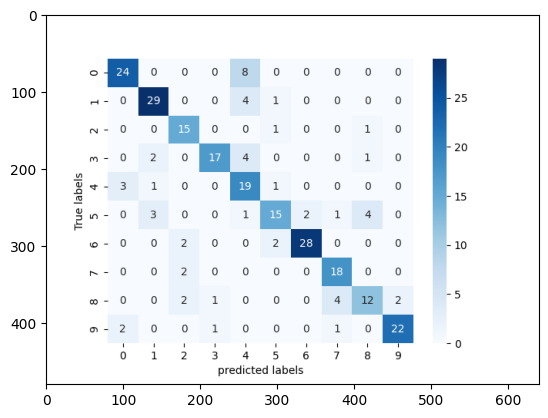

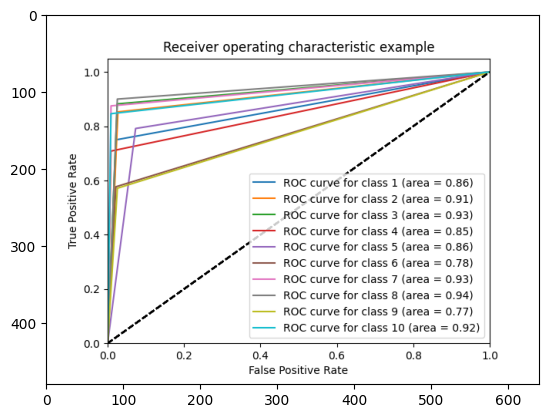

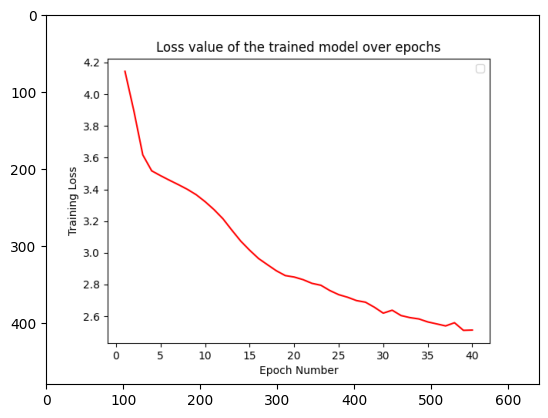

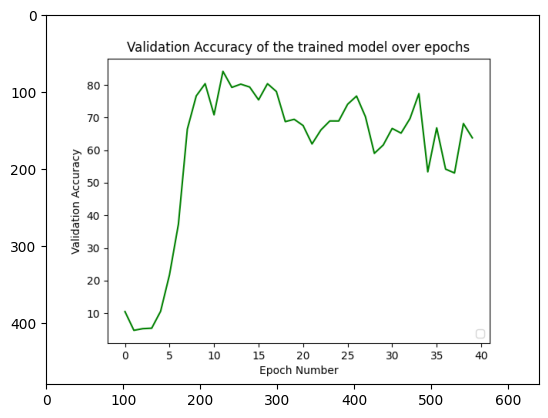

In [ ]:
CM = plt.imread("/content/Confusion_Matrix.png")
plt.figure()
plt.imshow(CM)

ROC = plt.imread("/content/ROC_AudioMNIST.png")
plt.figure()
plt.imshow(ROC)

loss = plt.imread("/content/Loss_AudioMNIST.png")
plt.figure()
plt.imshow(loss)

val_acc = plt.imread("/content/Val_Accuracy_AudioMNIST.png")
plt.figure()
plt.imshow(val_acc)


---
##***1-4) Transfer Learning Based on Forward Forward Algorithm***

In [16]:
%%file Net.py
import torch
import torchvision


class AlexNet(torch.nn.Module):
    def __init__(self, training = True):
        super().__init__()
        self.model = torchvision.models.alexnet(training)
        for param in self.model.parameters():
            param.requires_grad = False
        self.feature_extractor = self.model.features

    def forward(self, x):
        return self.feature_extractor(x)





class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, dropout=0.0, bias=True, device=None, dtype=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Linear(in_features, out_features))
        #layers.append(torch.nn.BatchNorm1d(out_features))
        layers.append(torch.nn.ReLU())


        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.05)
        self.threshold = 2



    def forward(self, x):
      x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
      return self.mlp(x_direction)


    def train_model(self, x_pos, x_neg):

        g_pos = self.forward(x_pos).pow(2).mean(1)
        g_neg = self.forward(x_neg).pow(2).mean(1)
        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()

        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()


Overwriting Net.py


In [17]:
%%file hparams_ForwardForward.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mohammad Mahdi Moradi 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/AudioMNIST/CRNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 40

## Threshold for Energy computation of loss function
threshold: 3

# Training Parameters
input_channels: 1
sample_rate: 16000
number_of_epochs: 80
batch_size: 256
lr_start: 0.001
lr_final: 0.0001
n_classes: 10 # In this case, we have 10 digits
emb_dim: 128 # dimensionality of the embeddings
dataloader_options:
    batch_size: !ref <batch_size>

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Pre Trained Model (AlexNet)
#pre_trained_model: !new:Net.pre_trained_model
pre_trained_model: !new:Net.AlexNet
    training: True


# Clasifier applied on top of the embeddings
Linear1: !new:Net.Linear
    in_features: 9226
    out_features: 2048

Linear2: !new:Net.Linear
    in_features: 2048
    out_features: 512

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    pre_trained_model: !ref <pre_trained_model>
    Linear1: !ref <Linear1>
    Linear2: !ref <Linear2>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        pre_trained_model: !ref <pre_trained_model>
        Linear1: !ref <Linear1>
        Linear2: !ref <Linear2>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_ForwardForward.yaml


In [18]:
%%file train.py
import numpy as np
import torchvision


#!/usr/bin/env python3
"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class DigitBrain(sb.Brain):

    #6
    def compute_forward(self, batch, stage):
        batch = batch.to(self.device)
        wavs, lens = batch.sig
        y, _ = batch.digit_encoded
        y = y.squeeze()



        ## Extracting FBANK features
        wavs = self.modules.compute_features(wavs)

        ## Normalizing
        wavs = self.modules.mean_var_norm(wavs, lens)

        ## Resizing
        wavs = torchvision.transforms.Resize((225, 225))(wavs)
        wavs = wavs.unsqueeze(1)
        wavs = torch.cat([wavs, wavs, wavs], dim=1)

        # Your code here. Aim for 7-8 lines
        if stage == sb.Stage.TRAIN:

            ## Pre Trained Model
            h = self.modules.pre_trained_model(wavs)
            h = h.view((h.shape[0], -1))

            ## Flatteing the output of Convolutional Layer
            rnd = torch.randperm(h.size(0))
            y_neg = y[rnd]
            max, index = torch.max(h, dim=1)

            x1 = max * torch.nn.functional.one_hot(y, num_classes=self.hparams.n_classes).to(self.device).T
            x2 = max * torch.nn.functional.one_hot(y_neg, num_classes=self.hparams.n_classes).to(self.device).T

            h_pos = torch.cat([h, x1.T], dim=1)
            h_neg = torch.cat([h, x2.T], dim=1)

            ## Lieanr Layers
            h_pos, h_neg, loss4 = self.modules.Linear1.train_model(h_pos, h_neg)
            h_pos, h_neg, loss5 = self.modules.Linear2.train_model(h_pos, h_neg)

            return (loss4, loss5)

        if stage != sb.Stage.TRAIN:
            x = wavs
            goodness_per_label = []
            for label in range(self.hparams.n_classes):
                goodness = []
                h = self.modules.pre_trained_model(x)
                h = h.view((h.shape[0], -1))

                max, index = torch.max(h, dim=1)
                h1 = max * torch.nn.functional.one_hot(torch.tensor([label]*h.shape[0]), num_classes=self.hparams.n_classes).to(self.device).T
                h = torch.cat([h, h1.T], dim=1)


                h = self.modules.Linear1.forward(h)
                goodness += [h.pow(2).mean(1)]
                h = self.modules.Linear2.forward(h)
                goodness += [h.pow(2).mean(1)]

                goodness_per_label += [sum(goodness).unsqueeze(1)]
            goodness_per_label = torch.cat(goodness_per_label, 1)

            if (stage == sb.Stage.TEST):
                self.y_test_true.append(y)
                self.y_test_pred.append(goodness_per_label.argmax(1))
            return goodness_per_label.argmax(1)





    def compute_objectives(self, outputs, batch, stage):
        _, lens = batch.sig
        digit, _ = batch.digit_encoded
        digit = digit.squeeze()
        if stage == sb.Stage.TRAIN:
            (loss4, loss5) = outputs

            return loss4 + loss5

        if stage != sb.Stage.TRAIN:
          return outputs.eq(digit.to(self.device)).float().mean().item()


    def loss_function(self, x_pos, x_neg, threshold):
        return torch.log(1 + torch.exp(torch.cat([-x_pos + threshold, x_neg - threshold]))).mean()

    #5
    def fit_batch(self, batch):
        losses = self.compute_forward(batch, sb.Stage.TRAIN)

        loss = self.compute_objectives(losses, batch, sb.Stage.TRAIN)
        loss = torch.tensor(loss)

        return loss.detach()


    def evaluate_batch(self, batch, stage=sb.Stage.TEST):
        if (stage == sb.Stage.VALID):
            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)

        elif (stage == sb.Stage.TEST):
            if self.load_model_flag == True and os.path.exists("best_model.pth"):
                  self.load()
                  print("\n$$$$$$$$$$ Loading Best Model $$$$$$$$$$")
                  self.load_model_flag = False

            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)


        return loss.detach()

    #2
    def on_fit_start(self):
        self.last_epoch = 0
        self.last_batch = None
        self.last_loss_stats = {}

        self.schedular1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear1.opt, mode='min', factor=0.1, patience=15, threshold=0.0001)
        self.schedular2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear2.opt, mode='min', factor=0.1, patience=15, threshold=0.0001)
        self.best_loss = -np.inf

        self.train_losses = []
        self.valid_accuracy = []

        self.y_test_true = []
        self.y_test_pred = []
        self.load_model_flag = True
        return super().on_fit_start()

    #4
    def on_stage_start(self, stage, epoch=None):
        self.accuracy = 0



        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()



    def on_stage_end(self, stage, stage_loss, epoch=None):
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
            self.train_losses.append(stage_loss)

        elif stage == sb.Stage.VALID:
            stats = {
                "Accuracy": (self.accuracy/8)*100,
            }
            self.valid_accuracy.append((self.accuracy/8)*100)



        if stage == sb.Stage.VALID:
            if (self.best_loss < stage_loss):
              print("\n@@@@@@@@@@ Savaing Best Model @@@@@@@@@@")
              self.best_loss = stage_loss
              self.save('best_model.pth')

            old_lr = self.modules.Linear1.opt.param_groups[0]["lr"]
            """self.schedular1.step(self.accuracy)
            self.schedular2.step(self.accuracy)"""
            new_lr = self.modules.Linear1.opt.param_groups[0]["lr"]



            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            #self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])


        if stage == sb.Stage.TEST:
            y_true = list(self.y_test_true[0].cpu().numpy())
            y_hat = list(self.y_test_pred[0].cpu().numpy())

            y_true2 = torch.nn.functional.one_hot(torch.tensor(y_true), num_classes=self.hparams.n_classes)
            self.y_true_ndarray = y_true2.numpy()
            y_hat2 = torch.nn.functional.one_hot(torch.tensor(y_hat), num_classes=self.hparams.n_classes)
            self.y_hat_ndarray = y_hat2.numpy()

            stats_test = {
                "Accuracy": (self.accuracy/8)*100,
                "Recall": (recall_score(y_true, y_hat, average="macro") * 100),
                "Precision": (precision_score(y_true, y_hat, average="macro") * 100),
                "F1-Score": (f1_score(y_true, y_hat, average="macro") * 100),
            }


            self.CM = confusion_matrix(y_true, y_hat)


            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats_test,
            )


    def save(self, epoch, path='best_model.pth'):
      model_params = {}
      optimizer_params = {}

      model_params["fc_layer1"] = self.modules.Linear1.state_dict()
      model_params["fc_layer2"] = self.modules.Linear2.state_dict()
      optimizer_params["fc_layer1"] = self.modules.Linear1.opt.state_dict()
      optimizer_params["fc_layer2"] = self.modules.Linear2.opt.state_dict()

      torch.save({
            "model_params": model_params,
            "optimizer_params": optimizer_params
        }, path)


    def load(self, path="best_model.pth"):
      loaded_model = torch.load(path)
      model_params = loaded_model["model_params"]
      optimizer_params = loaded_model["optimizer_params"]

      self.modules.Linear1.load_state_dict(model_params["fc_layer1"])
      self.modules.Linear2.load_state_dict(model_params["fc_layer2"])

      self.modules.Linear1.opt.load_state_dict(optimizer_params["fc_layer1"])
      self.modules.Linear2.opt.load_state_dict(optimizer_params["fc_layer2"])


    #7
    def overlay_y_on_x(self, x, y):
        x_ = torch.zeros((x.shape[0], x.shape[1], x.shape[2], x.shape[3]))
        for i in range(x.shape[0]):
          mat = np.array(x[i,0,:,:].cpu())
          mat[0,0] = mat.min()
          if (y[i] == 0):
            mat[0,0] = mat.max()

          mat[1,0] = mat.min()
          if (y[i] == 1):
            mat[1,0] = mat.max()

          mat[2,0] = mat.min()
          if (y[i] == 2):
            mat[2,0] = mat.max()

          mat[0,1] = mat.min()
          if (y[i] == 3):
            mat[0,1] = mat.max()

          mat[1,1] = mat.min()
          if (y[i] == 4):
            mat[1,1] = mat.max()

          mat[2,1] = mat.min()
          if (y[i] == 5):
            mat[2,1] = mat.max()

          mat[0,2] = mat.min()
          if (y[i] == 6):
            mat[0,2] = mat.max()

          mat[1,2] = mat.min()
          if (y[i] == 7):
            mat[1,2] = mat.max()

          mat[2,2] = mat.min()
          if (y[i] == 8):
            mat[2,2] = mat.max()

          mat[0,3] = mat.min()
          if (y[i] == 9):
            mat[0,3] = mat.max()

          x_[i, 0, :, :]= torch.tensor(mat)
        return x_

# 1
def dataio_prep(hparams):
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):

        sig, fs = torchaudio.load(wav)

        sig = sig[0,:]
        sig = torchaudio.functional.resample(sig, fs, 16000)

        return sig


    @sb.utils.data_pipeline.takes("digit")
    @sb.utils.data_pipeline.provides("digit", "digit_encoded")
    def label_pipeline(digit):

        yield digit
        digit_encoded = label_encoder.encode_label_torch(digit)
        yield digit_encoded


    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }

    hparams["dataloader_options"]["shuffle"] = True

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "digit_encoded"],
        )


    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="digit",
    )

    return datasets



if __name__ == "__main__":

    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)

    digit_brain = DigitBrain(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )


    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    print("///////////////////////////////////////////////////////////////////")
    test_stats = digit_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )



    ##### Plotting training loss and Validation Accuracy
    plt.figure()
    epoches = [i+1 for i in range(hparams['number_of_epochs'])]
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.title('Loss value of the trained model over epochs')
    plt.legend(loc="upper right")
    plt.plot(epoches, digit_brain.train_losses, 'r')
    plt.savefig("Loss_AudioMNIST.png")

    plt.figure()
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy of the trained model over epochs')
    plt.legend(loc="lower right")
    plt.plot(digit_brain.valid_accuracy, 'g')
    plt.savefig("Val_Accuracy_AudioMNIST.png")

    ##### Plotting Confusion Matrix
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(digit_brain.CM, annot=True ,ax=ax, fmt='d', cmap=plt.cm.Blues)

    ax.set_xlabel('predicted labels')
    ax.set_ylabel('True labels')
    plt.savefig("Confusion_Matrix.png")
    ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()


    ##### PLotting ROC curve and the AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(hparams["n_classes"]):
        fpr[i], tpr[i], _ = roc_curve(digit_brain.y_true_ndarray[:, i], digit_brain.y_hat_ndarray[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(hparams["n_classes"]):
        plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f"ROC_AudioMNIST.png")

Overwriting train.py


In [19]:
!rm -rf ./content/results/AudioMNIST/CRNN/1986
!python train.py hparams_ForwardForward.yaml

/home/moh7596/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/moh7596/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/AudioMNIST/CRNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 19.9M trainable paramet

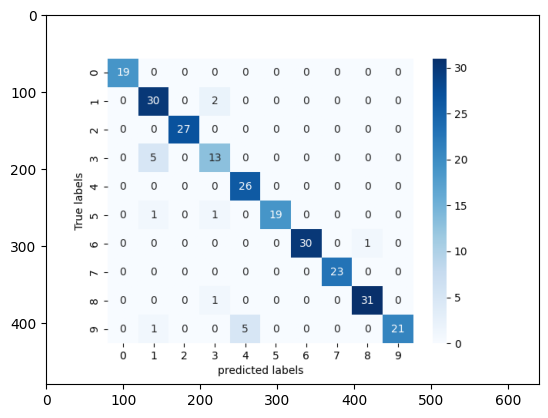

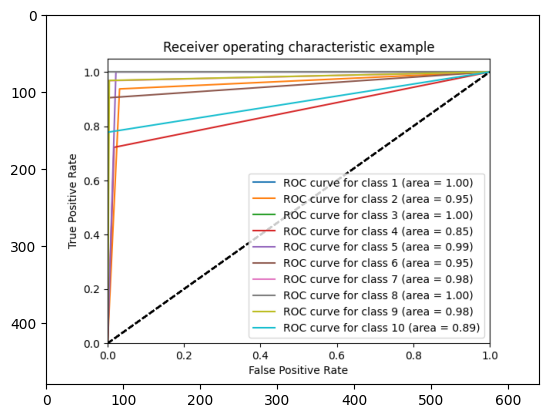

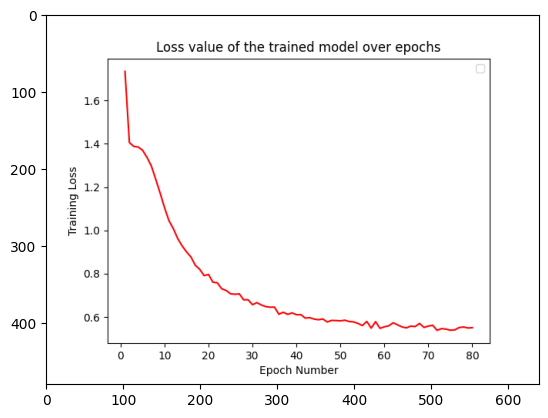

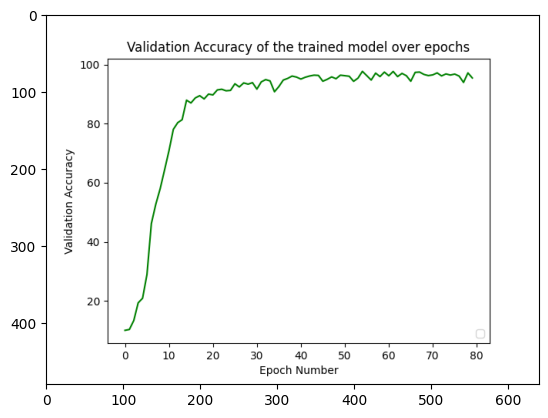

In [ ]:
CM = plt.imread("/content/Confusion_Matrix.png")
plt.figure()
plt.imshow(CM)

ROC = plt.imread("/content/ROC_AudioMNIST.png")
plt.figure()
plt.imshow(ROC)

loss = plt.imread("/content/Loss_AudioMNIST.png")
plt.figure()
plt.imshow(loss)

val_acc = plt.imread("/content/Val_Accuracy_AudioMNIST.png")
plt.figure()
plt.imshow(val_acc)


#**-----------------------------------------------------------------------**
##**2) Human Speech Emotion Classification Database**
#**-----------------------------------------------------------------------**

**Dataset Prepration:** In this part, Human Speech Emotion Classification Database is supposed to be Downloaded, splitted into train, test and validation, and stored into their corresponding Data Loader. This database is composed of 8 different emotions called ((neutral, calm, happy, sad, angry, fearful, disgust, surprised)). It should be noted that this is small dataset, that's why getting good results was challenging even by Transfer Learning Algorithm.

In [22]:
import random
import shutil
data = speechbrain.utils.data_utils.get_all_files("/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24", match_and=['.wav'])
if os.path.exists("/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24"):
    shutil.rmtree(path="/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24")

##### Male and Female Dataset
male = []
female = []
for actor in data:
    if (int(actor.split("/")[-2].split("_")[-1]) % 2 == 0):
        female.append((data, 0))
    else:
        male.append((data, 1))

random.shuffle(male)
random.shuffle(female)
train_files = male[:int(0.8*len(male))] + female[:int(0.8*len(female))]
test_files = male[int(0.8*len(male)):] + female[int(0.8*len(female)):]
valid_files = test_files
print(len(train_files))
print(len(test_files))
print(len(valid_files))


##### Emotion Dataset
neutral, calm, happy, sad, angry, fearful, disgust, surprised = [], [], [], [], [], [], [], []
print(data[0])
print(int(data[0].split("/")[-1].split(".")[0].split("-")[2]))
for audio_file in data:
    if int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 1:
        neutral.append((audio_file, 0))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 2:
        calm.append((audio_file, 1))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 3:
        happy.append((audio_file, 2))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 4:
        sad.append((audio_file, 3))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 5:
        angry.append((audio_file, 4))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 6:
        fearful.append((audio_file, 5))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 7:
        disgust.append((audio_file, 6))
    elif int(audio_file.split("/")[-1].split(".")[0].split("-")[2]) == 8:
        surprised.append((audio_file, 7))

random.shuffle(neutral)
random.shuffle(calm)
random.shuffle(happy)
random.shuffle(sad)
random.shuffle(angry)
random.shuffle(fearful)
random.shuffle(disgust)
random.shuffle(surprised)


train_files = neutral[:int(0.7*len(neutral))] + calm[:int(0.7*len(calm))] + happy[:int(0.7*len(happy))] + sad[:int(0.7*len(sad))] + angry[:int(0.7*len(angry))] + fearful[:int(0.7*len(fearful))] + disgust[:int(0.7*len(disgust))] + surprised[:int(0.7*len(surprised))]
test_files = neutral[int(0.7*len(neutral)):int(0.85*len(neutral))] + calm[int(0.7*len(calm)):int(0.85*len(calm))] + happy[int(0.7*len(happy)):int(0.85*len(happy))] + sad[int(0.7*len(sad)):int(0.85*len(sad))] + angry[int(0.7*len(angry)):int(0.85*len(angry))] + fearful[int(0.7*len(fearful)):int(0.85*len(fearful))] + disgust[int(0.7*len(disgust)):int(0.85*len(disgust))] + surprised[int(0.7*len(surprised)):int(0.85*len(surprised))]
valid_files = neutral[int(0.85*len(neutral)):] + calm[int(0.85*len(calm)):] + happy[int(0.85*len(happy)):] + sad[int(0.85*len(sad)):] + angry[int(0.85*len(angry)):] + fearful[int(0.85*len(fearful)):] + disgust[int(0.85*len(disgust)):] + surprised[int(0.85*len(surprised)):]

print(len(train_files))
print(len(test_files))
print(len(valid_files))

print(train_files[0])
print(calm[0])

1152
288
288
/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24/Actor_21/03-01-03-01-01-02-21.wav
3
1005
217
218
('/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24/Actor_07/03-01-01-01-02-01-07.wav', 0)
('/home/moh7596/Dataset/Human Speech Emotion Classification (RAVDESS)/audio_speech_actors_01-24/Actor_04/03-01-02-02-01-02-04.wav', 1)


##***2-1) Transfer Learning Based on BackPropagation***

In [30]:
from tqdm import tqdm
from torch.nn.modules.linear import Linear

class MNIST_Dataset(torch.utils.data.Dataset):
  def __init__(self, dataset, transform=None):
    self.dataset = dataset
    self.transforms = transform


  def __len__(self):
    return len(self.dataset)


  def __getitem__(self, idx):
    audio, sampling_freq = torchaudio.load(self.dataset[idx][0])
    label = self.dataset[idx][1]

    lengths = []

    sig = audio[0,:]
    sig = torchaudio.functional.resample(sig, sampling_freq, 16000)

    if self.transforms:
      fbank = features.Fbank(n_mels=40)(sig.unsqueeze(dim=0))
      #fbank = (fbank + 83.26512145996094 ) / (20.686758041381836 + 83.26512145996094)
      mean_var_norm = normalization.InputNormalization(norm_type="global")
      lengths.append(sig.shape[0]/16000)
      fbank = mean_var_norm(fbank, torch.tensor(lengths))
      #print(waveform.shape)
      waveform = torchvision.transforms.Resize((224, 224))(fbank)
      #waveform = torch.cat((waveform, waveform, waveform), dim=0)

    return waveform, label


train_dataset = MNIST_Dataset(train_files, transform=True)
test_dataset = MNIST_Dataset(test_files, transform=True)
valid_dataset = MNIST_Dataset(valid_files, transform=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

print(train_loader)
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
print(next(iter(train_loader))[0].shape)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNN(torch.nn.Module):
    def __init__(self, feature_extractor):
        super(CNN, self).__init__()
        self.feature_extractor = feature_extractor
        self.linear = torch.nn.Sequential(
           torch.nn.Linear(in_features=9216, out_features=2048),
           torch.nn.BatchNorm1d(num_features=2048),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=2048, out_features=512),
           torch.nn.BatchNorm1d(num_features=512),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=512, out_features=8)
        )

    def forward(self, x):
        out = self.feature_extractor(x)

        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out

alexnet = torchvision.models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False


cnn = CNN(alexnet.features)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001)
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, threshold=0.0001, patience=3)




def train_model(model, num_epoch, train_loader, valid_loader):
    best_accuracy = -np.inf
    for epoch in range(num_epoch):
        model.train()
        losses = []
        for i, (x_tr, y_tr) in tqdm(enumerate(train_loader)):
            x_tr = torch.cat([x_tr, x_tr, x_tr], dim=1)
            x_tr, y_tr = x_tr.to(device), y_tr.to(device)
            y_pred = model(x_tr)

            loss = loss_func(y_pred, y_tr)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1} ----- train loss: {np.sum(losses)}")

        model.eval()
        total_accuracy = 0
        for j, (x_val, y_val) in enumerate(valid_loader):
            x_val = torch.cat([x_val, x_val, x_val], dim=1)
            x_val, y_val = x_val.to(device), y_val.to(device)
            model_pred = model(x_val)
            y_pred = torch.max(model_pred, 1)[1].data.squeeze()
            accuracy = (y_pred == y_val).sum().item() / float(y_val.size(0))
            total_accuracy += accuracy

        before_lr = optimizer.param_groups[0]['lr']
        schedular.step(total_accuracy/len(valid_loader))
        after_lr = optimizer.param_groups[0]['lr']
        if before_lr == after_lr:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)}")
        else:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)} ----- Learning Rate: {before_lr} --> {after_lr}")

        if total_accuracy > best_accuracy:
            print("Saving Best Model...")
            best_accuracy = total_accuracy
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_func
            }, "saved_model.pth")
train_model(cnn.to(device), 15, train_loader, valid_loader)



loaded_model = torch.load("saved_model.pth")
cnn.load_state_dict(loaded_model['model_state_dict'])
optimizer.load_state_dict(loaded_model['optimizer_state_dict'])

def test():
    # Test the model
    cnn.eval()
    cnn.to(device)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = torch.cat([images, images, images], dim=1)
            images, labels = images.to(device), labels.to(device)
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            total += accuracy
            pass

        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        print(f'Test Accuracy of the model on the test images: {total/len(test_loader)}')
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

    pass
test()

4
1
1
torch.Size([256, 1, 224, 224])


4it [00:04,  1.01s/it]


Epoch 1 ----- train loss: 7.143165588378906
Valid Accuracy of the model in Epoch 1 is: 0.38073394495412843
Saving Best Model...


4it [00:03,  1.03it/s]


Epoch 2 ----- train loss: 3.599665641784668
Valid Accuracy of the model in Epoch 2 is: 0.46788990825688076
Saving Best Model...


4it [00:04,  1.05s/it]


Epoch 3 ----- train loss: 2.238929659128189
Valid Accuracy of the model in Epoch 3 is: 0.5321100917431193
Saving Best Model...


4it [00:04,  1.08s/it]


Epoch 4 ----- train loss: 1.480411946773529
Valid Accuracy of the model in Epoch 4 is: 0.5642201834862385
Saving Best Model...


4it [00:04,  1.03s/it]


Epoch 5 ----- train loss: 0.9903119802474976
Valid Accuracy of the model in Epoch 5 is: 0.5871559633027523
Saving Best Model...


4it [00:04,  1.00s/it]


Epoch 6 ----- train loss: 0.6859692633152008
Valid Accuracy of the model in Epoch 6 is: 0.5871559633027523


4it [00:03,  1.04it/s]


Epoch 7 ----- train loss: 0.4915260672569275
Valid Accuracy of the model in Epoch 7 is: 0.6100917431192661
Saving Best Model...


4it [00:03,  1.02it/s]


Epoch 8 ----- train loss: 0.37306009978055954
Valid Accuracy of the model in Epoch 8 is: 0.6192660550458715
Saving Best Model...


4it [00:03,  1.02it/s]


Epoch 9 ----- train loss: 0.2884645536541939
Valid Accuracy of the model in Epoch 9 is: 0.6055045871559633


4it [00:03,  1.03it/s]


Epoch 10 ----- train loss: 0.22637031972408295
Valid Accuracy of the model in Epoch 10 is: 0.6055045871559633


4it [00:03,  1.04it/s]


Epoch 11 ----- train loss: 0.18768960237503052
Valid Accuracy of the model in Epoch 11 is: 0.6100917431192661


4it [00:03,  1.04it/s]


Epoch 12 ----- train loss: 0.15868515521287918
Valid Accuracy of the model in Epoch 12 is: 0.6146788990825688 ----- Learning Rate: 0.0001 --> 5e-05


4it [00:03,  1.04it/s]


Epoch 13 ----- train loss: 0.14109811931848526
Valid Accuracy of the model in Epoch 13 is: 0.6192660550458715


4it [00:03,  1.05it/s]


Epoch 14 ----- train loss: 0.13430144265294075
Valid Accuracy of the model in Epoch 14 is: 0.6284403669724771
Saving Best Model...


4it [00:03,  1.02it/s]


Epoch 15 ----- train loss: 0.12660136260092258
Valid Accuracy of the model in Epoch 15 is: 0.6284403669724771
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Test Accuracy of the model on the test images: 0.6774193548387096
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


**Creating Jason File:** In this section, the information our dataset will be stored into three json files called ((train.json)), ((test.json)), ((valid.json)).

In [31]:
import json
from tqdm import tqdm

def create_json(json_file, audiolist):
  json_dict = {}
  for audiofile in tqdm(audiolist):

    audioinfo = torchaudio.info(audiofile[0])

    duration = audioinfo.num_frames/audioinfo.sample_rate

    digit = audiofile[1]

    uttid =  audiofile[0].split("/")[-1]

    json_dict[uttid] = {
            "wav": audiofile[0],
            "length": duration,
            "digit": str(digit),
    }

    with open(json_file, mode="w") as json_f:
        json.dump(json_dict, json_f, indent=2)



create_json('train.json', train_files)
create_json('valid.json', valid_files)
create_json('test.json', test_files)

100%|██████████| 217/217 [00:00<00:00, 1332.75it/s]


##***2-2 Transfer Learning Based on Forward Forward Algorithm***

In [36]:
%%file Net.py
import torch
import torchvision


class AlexNet(torch.nn.Module):
    def __init__(self, training = True):
        super().__init__()
        self.model = torchvision.models.alexnet(training)
        for param in self.model.parameters():
            param.requires_grad = False
        """layers = list(self.model.children())
        self.feature_extractor = torch.nn.Sequential(*layers[:-1])"""
        self.feature_extractor = self.model.features

    def forward(self, x):
        return self.feature_extractor(x)





class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, dropout=0.0, bias=True, device=None, dtype=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Linear(in_features, out_features))
        #layers.append(torch.nn.BatchNorm1d(out_features))
        layers.append(torch.nn.ReLU())


        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.05)
        self.threshold = 1



    def forward(self, x):
      x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
      return self.mlp(x_direction)


    def train_model(self, x_pos, x_neg):

        g_pos = self.forward(x_pos).pow(2).mean(1)
        g_neg = self.forward(x_neg).pow(2).mean(1)
        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()

        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()


Overwriting Net.py


In [37]:
%%file hparams_ForwardForward.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mohammad Mahdi Moradi 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/AudioMNIST/CRNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 40

## Threshold for Energy computation of loss function
threshold: 3

# Training Parameters
input_channels: 1
sample_rate: 16000
number_of_epochs: 1000
batch_size: 256
lr_start: 0.001
lr_final: 0.0001
n_classes: 8 # In this case, we have 10 digits
emb_dim: 128 # dimensionality of the embeddings
dataloader_options:
    batch_size: !ref <batch_size>

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Pre Trained Model (AlexNet)
#pre_trained_model: !new:Net.pre_trained_model
pre_trained_model: !new:Net.AlexNet
    training: True


# Clasifier applied on top of the embeddings
Linear1: !new:Net.Linear
    in_features: 9224
    out_features: 2048

Linear2: !new:Net.Linear
    in_features: 2048
    out_features: 512

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    pre_trained_model: !ref <pre_trained_model>
    Linear1: !ref <Linear1>
    Linear2: !ref <Linear2>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        pre_trained_model: !ref <pre_trained_model>
        Linear1: !ref <Linear1>
        Linear2: !ref <Linear2>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_ForwardForward.yaml


In [38]:
%%file train.py
import numpy as np
import torchvision


#!/usr/bin/env python3
"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class DigitBrain(sb.Brain):

    #6
    def compute_forward(self, batch, stage):
        batch = batch.to(self.device)
        wavs, lens = batch.sig
        y, _ = batch.digit_encoded
        y = y.squeeze()



        ## Extracting FBANK features
        wavs = self.modules.compute_features(wavs)

        ## Normalizing
        wavs = self.modules.mean_var_norm(wavs, lens)

        ## Resizing
        wavs = torchvision.transforms.Resize((225, 225))(wavs)
        wavs = wavs.unsqueeze(1)
        wavs = torch.cat([wavs, wavs, wavs], dim=1)

        # Your code here. Aim for 7-8 lines
        if stage == sb.Stage.TRAIN:

            ## Pre Trained Model
            h = self.modules.pre_trained_model(wavs)
            h = h.view((h.shape[0], -1))

            ## Flatteing the output of Convolutional Layer
            rnd = torch.randperm(h.size(0))
            y_neg = y[rnd]
            max, index = torch.max(h, dim=1)

            x1 = max * torch.nn.functional.one_hot(y, num_classes=self.hparams.n_classes).to(self.device).T
            x2 = max * torch.nn.functional.one_hot(y_neg, num_classes=self.hparams.n_classes).to(self.device).T

            h_pos = torch.cat([h, x1.T], dim=1)
            h_neg = torch.cat([h, x2.T], dim=1)

            ## Lieanr Layers
            h_pos, h_neg, loss4 = self.modules.Linear1.train_model(h_pos, h_neg)
            h_pos, h_neg, loss5 = self.modules.Linear2.train_model(h_pos, h_neg)

            return (loss4, loss5)

        if stage != sb.Stage.TRAIN:
            x = wavs
            goodness_per_label = []
            for label in range(self.hparams.n_classes):
                goodness = []
                h = self.modules.pre_trained_model(x)
                h = h.view((h.shape[0], -1))

                max, index = torch.max(h, dim=1)
                h1 = max * torch.nn.functional.one_hot(torch.tensor([label]*h.shape[0]), num_classes=self.hparams.n_classes).to(self.device).T
                h = torch.cat([h, h1.T], dim=1)


                h = self.modules.Linear1.forward(h)
                goodness += [h.pow(2).mean(1)]
                h = self.modules.Linear2.forward(h)
                goodness += [h.pow(2).mean(1)]

                goodness_per_label += [sum(goodness).unsqueeze(1)]
            goodness_per_label = torch.cat(goodness_per_label, 1)

            if (stage == sb.Stage.TEST):
                self.y_test_true.append(y)
                self.y_test_pred.append(goodness_per_label.argmax(1))
            return goodness_per_label.argmax(1)





    def compute_objectives(self, outputs, batch, stage):
        _, lens = batch.sig
        digit, _ = batch.digit_encoded
        digit = digit.squeeze()
        if stage == sb.Stage.TRAIN:
            (loss4, loss5) = outputs

            return loss4 + loss5

        if stage != sb.Stage.TRAIN:
          return outputs.eq(digit.to(self.device)).float().mean().item()


    def loss_function(self, x_pos, x_neg, threshold):
        return torch.log(1 + torch.exp(torch.cat([-x_pos + threshold, x_neg - threshold]))).mean()

    #5
    def fit_batch(self, batch):
        losses = self.compute_forward(batch, sb.Stage.TRAIN)

        loss = self.compute_objectives(losses, batch, sb.Stage.TRAIN)
        loss = torch.tensor(loss)

        return loss.detach()


    def evaluate_batch(self, batch, stage=sb.Stage.TEST):
        if (stage == sb.Stage.VALID):
            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)

        elif (stage == sb.Stage.TEST):
            if self.load_model_flag == True and os.path.exists("best_model.pth"):
                  self.load()
                  print("\n$$$$$$$$$$ Loading Best Model $$$$$$$$$$")
                  self.load_model_flag = False

            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)


        return loss.detach()

    #2
    def on_fit_start(self):
        self.last_epoch = 0
        self.last_batch = None
        self.last_loss_stats = {}

        self.schedular1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear1.opt, mode='min', factor=0.1, patience=15, threshold=0.0001)
        self.schedular2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear2.opt, mode='min', factor=0.1, patience=15, threshold=0.0001)
        self.best_loss = -np.inf

        self.train_losses = []
        self.valid_accuracy = []

        self.y_test_true = []
        self.y_test_pred = []
        self.load_model_flag = True
        return super().on_fit_start()

    #4
    def on_stage_start(self, stage, epoch=None):
        self.accuracy = 0



        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()



    def on_stage_end(self, stage, stage_loss, epoch=None):
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
            self.train_losses.append(stage_loss)

        elif stage == sb.Stage.VALID:
            stats = {
                "Accuracy": (self.accuracy/1)*100,
            }
            self.valid_accuracy.append((self.accuracy/1)*100)



        if stage == sb.Stage.VALID:
            if (self.best_loss < stage_loss):
              print("\n@@@@@@@@@@ Savaing Best Model @@@@@@@@@@")
              self.best_loss = stage_loss
              self.save('best_model.pth')

            old_lr = self.modules.Linear1.opt.param_groups[0]["lr"]
            """self.schedular1.step(self.accuracy)
            self.schedular2.step(self.accuracy)"""
            new_lr = self.modules.Linear1.opt.param_groups[0]["lr"]



            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            #self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])


        if stage == sb.Stage.TEST:
            y_true = list(self.y_test_true[0].cpu().numpy())
            y_hat = list(self.y_test_pred[0].cpu().numpy())

            y_true2 = torch.nn.functional.one_hot(torch.tensor(y_true), num_classes=self.hparams.n_classes)
            self.y_true_ndarray = y_true2.numpy()
            y_hat2 = torch.nn.functional.one_hot(torch.tensor(y_hat), num_classes=self.hparams.n_classes)
            self.y_hat_ndarray = y_hat2.numpy()

            stats_test = {
                "Accuracy": (self.accuracy/1)*100,
                "Recall": (recall_score(y_true, y_hat, average="macro") * 100),
                "Precision": (precision_score(y_true, y_hat, average="macro") * 100),
                "F1-Score": (f1_score(y_true, y_hat, average="macro") * 100),
            }


            self.CM = confusion_matrix(y_true, y_hat)


            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats_test,
            )


    def save(self, epoch, path='best_model.pth'):
      model_params = {}
      optimizer_params = {}

      model_params["fc_layer1"] = self.modules.Linear1.state_dict()
      model_params["fc_layer2"] = self.modules.Linear2.state_dict()
      optimizer_params["fc_layer1"] = self.modules.Linear1.opt.state_dict()
      optimizer_params["fc_layer2"] = self.modules.Linear2.opt.state_dict()

      torch.save({
            "model_params": model_params,
            "optimizer_params": optimizer_params
        }, path)


    def load(self, path="best_model.pth"):
      loaded_model = torch.load(path)
      model_params = loaded_model["model_params"]
      optimizer_params = loaded_model["optimizer_params"]

      self.modules.Linear1.load_state_dict(model_params["fc_layer1"])
      self.modules.Linear2.load_state_dict(model_params["fc_layer2"])

      self.modules.Linear1.opt.load_state_dict(optimizer_params["fc_layer1"])
      self.modules.Linear2.opt.load_state_dict(optimizer_params["fc_layer2"])


    #7
    def overlay_y_on_x(self, x, y):
        x_ = torch.zeros((x.shape[0], x.shape[1], x.shape[2], x.shape[3]))
        for i in range(x.shape[0]):
          mat = np.array(x[i,0,:,:].cpu())
          mat[0,0] = mat.min()
          if (y[i] == 0):
            mat[0,0] = mat.max()

          mat[1,0] = mat.min()
          if (y[i] == 1):
            mat[1,0] = mat.max()

          mat[2,0] = mat.min()
          if (y[i] == 2):
            mat[2,0] = mat.max()

          mat[0,1] = mat.min()
          if (y[i] == 3):
            mat[0,1] = mat.max()

          mat[1,1] = mat.min()
          if (y[i] == 4):
            mat[1,1] = mat.max()

          mat[2,1] = mat.min()
          if (y[i] == 5):
            mat[2,1] = mat.max()

          mat[0,2] = mat.min()
          if (y[i] == 6):
            mat[0,2] = mat.max()

          mat[1,2] = mat.min()
          if (y[i] == 7):
            mat[1,2] = mat.max()

          mat[2,2] = mat.min()
          if (y[i] == 8):
            mat[2,2] = mat.max()

          mat[0,3] = mat.min()
          if (y[i] == 9):
            mat[0,3] = mat.max()

          x_[i, 0, :, :]= torch.tensor(mat)
        return x_

# 1
def dataio_prep(hparams):
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):

        sig, fs = torchaudio.load(wav)

        sig = sig[0,:]
        sig = torchaudio.functional.resample(sig, fs, 16000)

        return sig


    @sb.utils.data_pipeline.takes("digit")
    @sb.utils.data_pipeline.provides("digit", "digit_encoded")
    def label_pipeline(digit):

        yield digit
        digit_encoded = label_encoder.encode_label_torch(digit)
        yield digit_encoded


    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }

    hparams["dataloader_options"]["shuffle"] = True

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "digit_encoded"],
        )


    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="digit",
    )

    return datasets



if __name__ == "__main__":

    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)

    digit_brain = DigitBrain(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )


    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    print("///////////////////////////////////////////////////////////////////")
    test_stats = digit_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )



    ##### Plotting training loss and Validation Accuracy
    plt.figure()
    epoches = [i+1 for i in range(hparams['number_of_epochs'])]
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.title('Loss value of the trained model over epochs')
    plt.legend(loc="upper right")
    plt.plot(epoches, digit_brain.train_losses, 'r')
    plt.savefig("Loss_AudioMNIST.png")

    plt.figure()
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy of the trained model over epochs')
    plt.legend(loc="lower right")
    plt.plot(digit_brain.valid_accuracy, 'g')
    plt.savefig("Val_Accuracy_AudioMNIST.png")

    ##### Plotting Confusion Matrix
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(digit_brain.CM, annot=True ,ax=ax, fmt='d', cmap=plt.cm.Blues)

    ax.set_xlabel('predicted labels')
    ax.set_ylabel('True labels')
    plt.savefig("Confusion_Matrix.png")
    ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7'])
    ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7'])
    plt.show()


    ##### PLotting ROC curve and the AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(hparams["n_classes"]):
        fpr[i], tpr[i], _ = roc_curve(digit_brain.y_true_ndarray[:, i], digit_brain.y_hat_ndarray[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(hparams["n_classes"]):
        plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f"ROC_AudioMNIST.png")

Overwriting train.py


In [39]:
!rm -rf ./results/AudioMNIST/CRNN/1986
!python train.py hparams_ForwardForward.yaml

/home/moh7596/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/moh7596/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/AudioMNIST/CRNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 19.9M trainable paramet

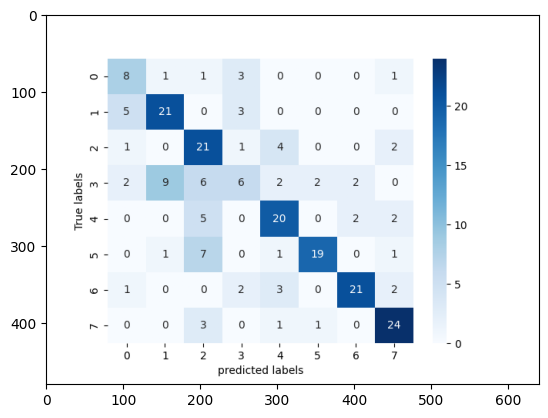

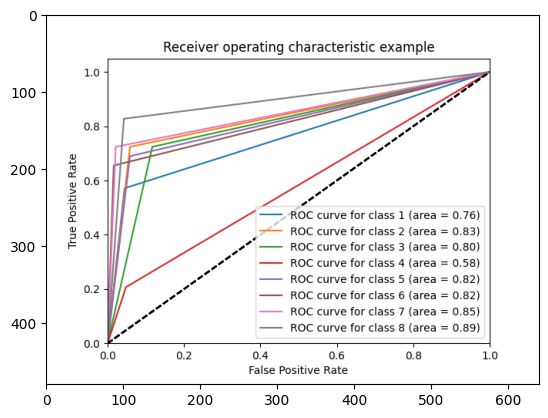

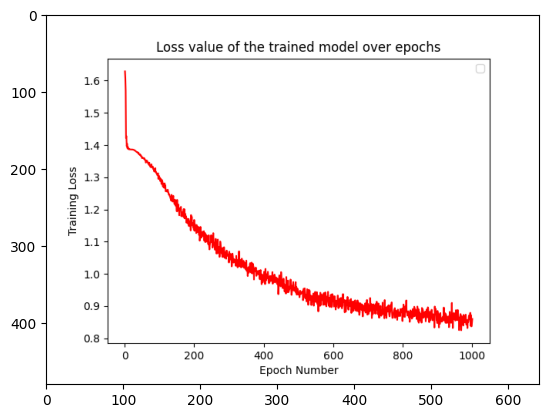

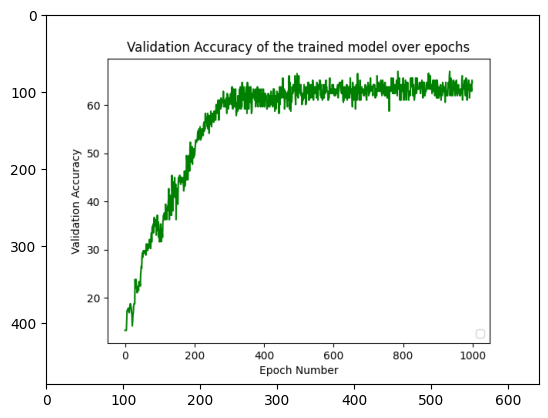

In [ ]:
CM = plt.imread("/content/Confusion_Matrix.png")
plt.figure()
plt.imshow(CM)

ROC = plt.imread("/content/ROC_AudioMNIST.png")
plt.figure()
plt.imshow(ROC)

loss = plt.imread("/content/Loss_AudioMNIST.png")
plt.figure()
plt.imshow(loss)

val_acc = plt.imread("/content/Val_Accuracy_AudioMNIST.png")
plt.figure()
plt.imshow(val_acc)


#**-----------------------------------------------------------------------**
##**3) Google Speech Command Database**
#**-----------------------------------------------------------------------**

**Dataset Prepration:** In this part, Google Speech Command Database is going to be used. This is a huge database with 35 classes. But again the problem was that, creating json file was so time-consuming that's why I just use 10 classes of this database.

In [49]:
from speechbrain.utils.data_utils import download_file
import shutil
import random
import glob

#all_words = ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']
all_words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
label_encoded = {}
for n, words in enumerate(all_words):
    label_encoded[words] = n

print(label_encoded)
base_adr = "/home/moh7596/Dataset/Speech Commands Dataset/"
train_files = []
valid_files = []
test_files = []


for word in all_words:
    data = glob.glob(base_adr + word + "/" + "*.wav")
    train_files += data[ : int(0.7 * len(data))]
    test_files += data[int(0.85 * len(data)) : ]
    valid_files += data[int(0.7 * len(data)) : int(0.85 * len(data))]


random.shuffle(train_files)
random.shuffle(test_files)
random.shuffle(valid_files)
print(len(train_files))
print(len(test_files))
print(len(valid_files))

print(train_files[0])

{'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}
27231
5841
5836
/home/moh7596/Dataset/Speech Commands Dataset/four/518588b6_nohash_0.wav


In [50]:
import json
from tqdm import tqdm

def create_json(json_file, audiolist):
  json_dict = {}
  for audiofile in tqdm(audiolist):

    audioinfo = torchaudio.info(audiofile)

    duration = audioinfo.num_frames/audioinfo.sample_rate

    digit = label_encoded[audiofile.split("/")[-2]]

    uttid =  audiofile.split("/")[-1]

    json_dict[uttid] = {
            "wav": audiofile,
            "length": duration,
            "digit": str(digit),
    }

    with open(json_file, mode="w") as json_f:
        json.dump(json_dict, json_f, indent=2)



create_json('train.json', train_files)
create_json('valid.json', valid_files)
create_json('test.json', test_files)

100%|██████████| 5841/5841 [00:24<00:00, 234.92it/s]


---
##***3-1) CNN-based model via Backpropagation***

In [52]:
from torch.nn.modules.linear import Linear
import json



class MNIST_Dataset(torch.utils.data.Dataset):
  def __init__(self, json_file, transform=None):
    self.json_file = open(json_file)
    self.dataset = json.load(self.json_file)
    print()
    self.transforms = transform


  def __len__(self):
    return len(self.dataset)


  def __getitem__(self, idx):
    audio, sampling_freq = torchaudio.load(self.dataset[list(self.dataset.keys())[idx]]['wav'])
    label = int(self.dataset[list(self.dataset.keys())[idx]]['digit'])

    lengths = []

    sig = audio[0,:]
    sig = torchaudio.functional.resample(sig, sampling_freq, 16000)

    if self.transforms:
      fbank = features.Fbank(n_mels=40)(sig.unsqueeze(dim=0))
      #fbank = (fbank + 83.26512145996094 ) / (20.686758041381836 + 83.26512145996094)
      mean_var_norm = normalization.InputNormalization(norm_type="global")
      lengths.append(sig.shape[0]/16000)
      fbank = mean_var_norm(fbank, torch.tensor(lengths))
      #print(waveform.shape)
      waveform = torchvision.transforms.Resize((101, 40))(fbank)
      #waveform = torch.cat((waveform, waveform, waveform), dim=0)

    return waveform, label


train_dataset = MNIST_Dataset("train.json", transform=True)
test_dataset = MNIST_Dataset("test.json", transform=True)
valid_dataset = MNIST_Dataset("valid.json", transform=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

print(train_loader)
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
print(next(iter(train_loader))[0].shape)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')





class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=11, stride=4, padding=2),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(num_features=192),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=192, out_channels=256, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(num_features=256),
            torch.nn.LeakyReLU()
        )
        self.linear = torch.nn.Sequential(
           torch.nn.Linear(in_features=1280, out_features=512),
           torch.nn.BatchNorm1d(num_features=512),
           torch.nn.LeakyReLU(),
           torch.nn.Linear(in_features=512, out_features=64),
           torch.nn.BatchNorm1d(num_features=64),
           torch.nn.LeakyReLU(),
           torch.nn.Linear(in_features=64, out_features=10)
        )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)

        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out


cnn = CNN()
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, threshold=0.0001, patience=3)




def train_model(model, num_epoch, train_loader, valid_loader):
    best_accuracy = -np.inf
    for epoch in range(num_epoch):
        model.train()
        losses = []
        for i, (x_tr, y_tr) in tqdm(enumerate(train_loader)):
            x_tr, y_tr = x_tr.to(device), y_tr.to(device)
            y_pred = model(x_tr)

            loss = loss_func(y_pred, y_tr)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1} ----- train loss: {np.sum(losses)}")

        model.eval()
        total_accuracy = 0
        for j, (x_val, y_val) in enumerate(valid_loader):
            x_val, y_val = x_val.to(device), y_val.to(device)
            model_pred = model(x_val)
            y_pred = torch.max(model_pred, 1)[1].data.squeeze()
            accuracy = (y_pred == y_val).sum().item() / float(y_val.size(0))
            total_accuracy += accuracy

        before_lr = optimizer.param_groups[0]['lr']
        schedular.step(total_accuracy/len(valid_loader))
        after_lr = optimizer.param_groups[0]['lr']
        if before_lr == after_lr:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)}")
        else:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)} ----- Learning Rate: {before_lr} --> {after_lr}")

        if total_accuracy > best_accuracy:
            print("Saving Best Model...")
            best_accuracy = total_accuracy
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_func
            }, "saved_model.pth")
train_model(cnn.to(device), 10, train_loader, valid_loader)



loaded_model = torch.load("saved_model.pth")
cnn.load_state_dict(loaded_model['model_state_dict'])
optimizer.load_state_dict(loaded_model['optimizer_state_dict'])

def test():
    # Test the model
    cnn.eval()
    cnn.to(device)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            total += accuracy
            pass
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        print(f'Test Accuracy of the model on the test images: {total/len(test_loader)}')
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

    pass
test()




21
5
5
torch.Size([256, 1, 101, 40])


21it [00:06,  3.19it/s]


Epoch 1 ----- train loss: 47.489885568618774
Valid Accuracy of the model in Epoch 1 is: 0.11834188432835821
Saving Best Model...


21it [00:06,  3.24it/s]


Epoch 2 ----- train loss: 42.32427704334259
Valid Accuracy of the model in Epoch 2 is: 0.11756063432835821


21it [00:06,  3.22it/s]


Epoch 3 ----- train loss: 38.941914439201355
Valid Accuracy of the model in Epoch 3 is: 0.11834188432835821


21it [00:06,  3.23it/s]


Epoch 4 ----- train loss: 33.509292244911194
Valid Accuracy of the model in Epoch 4 is: 0.09312033582089552


21it [00:06,  3.26it/s]


Epoch 5 ----- train loss: 30.66896164417267
Valid Accuracy of the model in Epoch 5 is: 0.09312033582089552 ----- Learning Rate: 0.001 --> 0.0005


21it [00:06,  3.26it/s]


Epoch 6 ----- train loss: 31.533081114292145
Valid Accuracy of the model in Epoch 6 is: 0.09312033582089552


21it [00:06,  3.15it/s]


Epoch 7 ----- train loss: 30.730312764644623
Valid Accuracy of the model in Epoch 7 is: 0.09312033582089552


21it [00:06,  3.17it/s]


Epoch 8 ----- train loss: 26.339559257030487
Valid Accuracy of the model in Epoch 8 is: 0.09312033582089552


21it [00:06,  3.19it/s]


Epoch 9 ----- train loss: 25.23830983042717
Valid Accuracy of the model in Epoch 9 is: 0.09233908582089552 ----- Learning Rate: 0.0005 --> 0.00025


21it [00:06,  3.27it/s]


Epoch 10 ----- train loss: 24.66857099533081
Valid Accuracy of the model in Epoch 10 is: 0.09390158582089551
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Test Accuracy of the model on the test images: 0.12202953296703296
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


---
##***3-2) Forward Forward-Based Learning from scratch***

In [53]:
%%file Linear.py
import torch


class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, dropout=0.0, bias=True, device=None, dtype=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Linear(in_features, out_features))
        #layers.append(torch.nn.BatchNorm1d(out_features))
        layers.append(torch.nn.LeakyReLU())


        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        #self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.001)
        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.01)
        self.schedular = torch.optim.lr_scheduler.StepLR(self.opt, step_size=1, gamma=0.2)

        #self.threshold = 3.5
        self.threshold = 1
        self.train_per_epoch_loss = 0



    def forward(self, x):
      x = x / (x.norm(2, 1, keepdim=True) + 1e-4)
      return self.mlp(x)


    def train_model(self, x_pos, x_neg):
        """if (epoch %21 == 0 and schedular_bool):
            before_lr = self.opt.param_groups[0]["lr"]
            self.schedular.step()
            after_lr = self.opt.param_groups[0]["lr"]
            print("***************************************************************")
            print(f"Learning Rate of layer {layer_number+1} changed from <{before_lr}> to <{after_lr}>")
            print("***************************************************************")"""

        g_pos = self.forward(x_pos).pow(2).mean(1)
        g_neg = self.forward(x_neg).pow(2).mean(1)
        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()


        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()

Overwriting Linear.py


In [54]:
%%file CNN.py
import torch


class CNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, max_kernel_size=3, max_stride=2, maxpooling=True, device=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, device=device))
        layers.append(torch.nn.BatchNorm2d(num_features=out_channels))
        layers.append(torch.nn.LeakyReLU())
        if maxpooling:
            layers.append(torch.nn.MaxPool2d(kernel_size=max_kernel_size, stride=max_stride))

        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        #self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.0001)
        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.001)
        self.schedular = torch.optim.lr_scheduler.StepLR(self.opt, step_size=1, gamma=0.5)

        #self.threshold = 3.5
        self.threshold = 1
        self.train_per_epoch_loss = 0


    def forward(self, x):
        #x_direction = x / (x.norm(2, dim=(2,3), keepdim=True) + 1e-4)
        return self.mlp(x)


    def train_model(self, x_pos, x_neg):
        """if schedular_bool and Apply_schedular_once:
            before_lr = self.opt.param_groups[0]["lr"]
            self.schedular.step()
            after_lr = self.opt.param_groups[0]["lr"]
            print("***************************************************************")
            print(f"Learning Rate of layer {layer_number+1} changed from <{before_lr}> to <{after_lr}>")
            print("***************************************************************")"""

        g_pos = self.forward(x_pos).pow(2).mean(dim=(1,2,3))
        g_neg = self.forward(x_neg).pow(2).mean(dim=(1,2,3))

        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()


        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()

Overwriting CNN.py


In [55]:
%%file hparams_ForwardForward.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mohammad Mahdi Moradi 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/AudioMNIST/CRNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 40

## Threshold for Energy computation of loss function
threshold: 3

# Training Parameters
input_channels: 1
sample_rate: 16000
number_of_epochs: 150
batch_size: 256
lr_start: 0.001
lr_final: 0.0001
n_classes: 10 # In this case, we have 10 digits
emb_dim: 128 # dimensionality of the embeddings
dataloader_options:
    batch_size: !ref <batch_size>

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Embedding model: from variable size digits gets a fixed size embedding vector
CNN1: !new:CNN.CNN
    in_channels: !ref <input_channels>
    out_channels: 64
    kernel_size: 11
    stride: 4
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: True

CNN2: !new:CNN.CNN
    in_channels: 64
    out_channels: 192
    kernel_size: 5
    stride: 1
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: True

CNN3: !new:CNN.CNN
    in_channels: 192

    out_channels: 256
    kernel_size: 5
    stride: 1
    padding: 2
    max_kernel_size: 3
    max_stride: 2
    maxpooling: False

# Clasifier applied on top of the embeddings
Linear1: !new:Linear.Linear
    in_features: 1290
    out_features: 512

Linear2: !new:Linear.Linear
    in_features: 512
    out_features: 64

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    CNN1: !ref <CNN1>
    CNN2: !ref <CNN2>
    CNN3: !ref <CNN3>
    Linear1: !ref <Linear1>
    Linear2: !ref <Linear2>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        CNN1: !ref <CNN1>
        CNN2: !ref <CNN2>
        CNN3: !ref <CNN3>
        Linear1: !ref <Linear1>
        Linear2: !ref <Linear2>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_ForwardForward.yaml


In [56]:
%%file train.py
import numpy as np
import torchvision


#!/usr/bin/env python3
"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class DigitBrain(sb.Brain):

    #6
    def compute_forward(self, batch, stage):
        batch = batch.to(self.device)
        wavs, lens = batch.sig
        y, _ = batch.digit_encoded
        y = y.squeeze()



        ## Extracting FBANK features
        wavs = self.modules.compute_features(wavs)

        ## Normalizing
        wavs = self.modules.mean_var_norm(wavs, lens)

        ## Resizing
        wavs = torchvision.transforms.Resize((101, 40))(wavs)

        ## Creating fake and real images
        wavs = wavs.unsqueeze(1)

        # Your code here. Aim for 7-8 lines
        if stage == sb.Stage.TRAIN:

            x_pos = self.overlay_y_on_x(wavs, y)
            rnd = torch.randperm(wavs.size(0))
            x_neg = self.overlay_y_on_x(wavs, y[rnd])
            h_pos = x_pos.to(self.device)
            h_neg = x_neg.to(self.device)

            ## Convolutional Layers
            h_pos1, h_neg1, loss1 = self.modules.CNN1.train_model(h_pos, h_neg)
            h_pos2, h_neg2, loss2 = self.modules.CNN2.train_model(h_pos1, h_neg1)
            h_pos3, h_neg3, loss3 = self.modules.CNN3.train_model(h_pos2, h_neg2)

            ## Flatteing the output of Convolutional Layer
            h_pos3 = h_pos3.view(h_pos3.size(0), -1)
            max_pos, index = torch.max(h_pos3, dim=1)
            x1 = max_pos * torch.nn.functional.one_hot(y).T

            h_pos3 = torch.cat([h_pos3, x1.T], dim=1)
            h_neg3 = h_neg3.view(h_neg3.size(0), -1)
            max_neg, index = torch.max(h_neg3, dim=1)
            x2 = max_neg * torch.nn.functional.one_hot(y[rnd]).T
            h_neg3 = torch.cat([h_neg3, x2.T], dim=1)

            ## Lieanr Layers
            h_pos4, h_neg4, loss4 = self.modules.Linear1.train_model(h_pos3, h_neg3)
            h_pos5, h_neg5, loss5 = self.modules.Linear2.train_model(h_pos4, h_neg4)

            return (loss1, loss2, loss3, loss4, loss5)

        if stage != sb.Stage.TRAIN:
            x = wavs
            goodness_per_label = []
            for label in range(self.hparams.n_classes):
                h = self.overlay_y_on_x(x, [label]*x.shape[0])
                goodness = []
                h = h.to(self.device)

                h = self.modules.CNN1.forward(h)
                h = self.modules.CNN2.forward(h)
                h = self.modules.CNN3.forward(h)

                h = h.view(h.size(0), -1)
                max, index = torch.max(h, dim=1)
                h1 = max * torch.nn.functional.one_hot(torch.tensor([label]*h.shape[0]).to(self.device), num_classes=self.hparams.n_classes).T
                h = torch.cat([h, h1.T], dim=1)
                h = self.modules.Linear1.forward(h)
                goodness += [h.pow(2).mean(1)]
                h = self.modules.Linear2.forward(h)
                goodness += [h.pow(2).mean(1)]

                goodness_per_label += [sum(goodness).unsqueeze(1)]
            goodness_per_label = torch.cat(goodness_per_label, 1)

            if (stage == sb.Stage.TEST):
                self.y_test_true.append(y)
                self.y_test_pred.append(goodness_per_label.argmax(1))
            return goodness_per_label.argmax(1)





    def compute_objectives(self, outputs, batch, stage):
        _, lens = batch.sig
        digit, _ = batch.digit_encoded
        digit = digit.squeeze()
        if stage == sb.Stage.TRAIN:
            (loss1, loss2, loss3, loss4, loss5) = outputs

            return loss1 + loss2 + loss3 + loss4 + loss5

        if stage != sb.Stage.TRAIN:
          return outputs.eq(digit.to(self.device)).float().mean().item()


    def loss_function(self, x_pos, x_neg, threshold):
        return torch.log(1 + torch.exp(torch.cat([-x_pos + threshold, x_neg - threshold]))).mean()

    #5
    def fit_batch(self, batch):
        losses = self.compute_forward(batch, sb.Stage.TRAIN)

        loss = self.compute_objectives(losses, batch, sb.Stage.TRAIN)
        loss = torch.tensor(loss)

        return loss.detach()


    def evaluate_batch(self, batch, stage=sb.Stage.TEST):
        if (stage == sb.Stage.VALID):
            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)

        elif (stage == sb.Stage.TEST):
            if self.load_model_flag == True and os.path.exists("best_model.pth"):
                  self.load()
                  print("\n$$$$$$$$$$ Loading Best Model $$$$$$$$$$")
                  self.load_model_flag = False

            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)


        return loss.detach()

    #2
    def on_fit_start(self):
        self.last_epoch = 0
        self.last_batch = None
        self.last_loss_stats = {}

        self.schedular1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN1.opt, mode='min', factor=0.9, patience=20, threshold=0.0001)
        self.schedular2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN2.opt, mode='min', factor=0.9, patience=20, threshold=0.0001)
        self.schedular3 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.CNN3.opt, mode='min', factor=0.9, patience=20, threshold=0.0001)
        self.best_loss = -np.inf

        self.train_losses = []
        self.valid_accuracy = []

        self.y_test_true = []
        self.y_test_pred = []
        self.load_model_flag = True
        return super().on_fit_start()

    #4
    def on_stage_start(self, stage, epoch=None):
        self.accuracy = 0



        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()



    def on_stage_end(self, stage, stage_loss, epoch=None):
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
            self.train_losses.append(stage_loss)

        elif stage == sb.Stage.VALID:
            stats = {
                "Accuracy": (self.accuracy/5)*100,
            }
            self.valid_accuracy.append((self.accuracy/5)*100)



        if stage == sb.Stage.VALID:
            if (self.best_loss < stage_loss):
              print("\n@@@@@@@@@@ Savaing Best Model @@@@@@@@@@")
              self.best_loss = stage_loss
              self.save('best_model.pth')

            old_lr = self.modules.CNN1.opt.param_groups[0]["lr"]
            self.schedular1.step(self.accuracy)
            self.schedular2.step(self.accuracy)
            self.schedular3.step(self.accuracy)
            new_lr = self.modules.CNN1.opt.param_groups[0]["lr"]



            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            #self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])


        if stage == sb.Stage.TEST:
            y_true = list(self.y_test_true[0].cpu().numpy())
            y_hat = list(self.y_test_pred[0].cpu().numpy())

            y_true2 = torch.nn.functional.one_hot(torch.tensor(y_true), num_classes=self.hparams.n_classes)
            self.y_true_ndarray = y_true2.numpy()
            y_hat2 = torch.nn.functional.one_hot(torch.tensor(y_hat), num_classes=self.hparams.n_classes)
            self.y_hat_ndarray = y_hat2.numpy()

            stats_test = {
                "Accuracy": (self.accuracy/5)*100,
                "Recall": (recall_score(y_true, y_hat, average="macro") * 100),
                "Precision": (precision_score(y_true, y_hat, average="macro") * 100),
                "F1-Score": (f1_score(y_true, y_hat, average="macro") * 100),
            }


            self.CM = confusion_matrix(y_true, y_hat)


            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats_test,
            )

    def save(self, epoch, path='best_model.pth'):
      model_params = {}
      opt_params = {}

      model_params["layer 1"] = self.modules.CNN1.state_dict()
      model_params["layer 2"] = self.modules.CNN2.state_dict()
      model_params["layer 3"] = self.modules.CNN3.state_dict()
      model_params["layer 4"] = self.modules.Linear1.state_dict()
      model_params["layer 5"] = self.modules.Linear2.state_dict()

      opt_params["layer 1"] = self.modules.CNN1.opt.state_dict()
      opt_params["layer 2"] = self.modules.CNN2.opt.state_dict()
      opt_params["layer 3"] = self.modules.CNN3.opt.state_dict()
      opt_params["layer 4"] = self.modules.Linear1.opt.state_dict()
      opt_params["layer 5"] = self.modules.Linear2.opt.state_dict()

      torch.save({
          'model_state_dict': model_params,
          'optimizer_state_dict': opt_params,
          }, path)

    def load(self, path="best_model.pth"):
      sd = torch.load(path)

      model_params = sd['model_state_dict']
      opt_params = sd['optimizer_state_dict']

      self.modules.CNN1.load_state_dict(model_params["layer 1"])
      self.modules.CNN2.load_state_dict(model_params["layer 2"])
      self.modules.CNN3.load_state_dict(model_params["layer 3"])
      self.modules.Linear1.load_state_dict(model_params["layer 4"])
      self.modules.Linear2.load_state_dict(model_params["layer 5"])

      self.modules.CNN1.opt.load_state_dict(opt_params["layer 1"])
      self.modules.CNN2.opt.load_state_dict(opt_params["layer 2"])
      self.modules.CNN3.opt.load_state_dict(opt_params["layer 3"])
      self.modules.Linear1.opt.load_state_dict(opt_params["layer 4"])
      self.modules.Linear2.opt.load_state_dict(opt_params["layer 5"])



    #7
    def overlay_y_on_x(self, x, y):
        x_ = torch.zeros((x.shape[0], x.shape[1], x.shape[2], x.shape[3]))
        for i in range(x.shape[0]):
          mat = np.array(x[i,0,:,:].cpu())
          mat[0,0] = mat.min()
          if (y[i] == 0):
            mat[0,0] = mat.max()

          mat[1,0] = mat.min()
          if (y[i] == 1):
            mat[1,0] = mat.max()

          mat[2,0] = mat.min()
          if (y[i] == 2):
            mat[2,0] = mat.max()

          mat[0,1] = mat.min()
          if (y[i] == 3):
            mat[0,1] = mat.max()

          mat[1,1] = mat.min()
          if (y[i] == 4):
            mat[1,1] = mat.max()

          mat[2,1] = mat.min()
          if (y[i] == 5):
            mat[2,1] = mat.max()

          mat[0,2] = mat.min()
          if (y[i] == 6):
            mat[0,2] = mat.max()

          mat[1,2] = mat.min()
          if (y[i] == 7):
            mat[1,2] = mat.max()

          mat[2,2] = mat.min()
          if (y[i] == 8):
            mat[2,2] = mat.max()

          mat[0,3] = mat.min()
          if (y[i] == 9):
            mat[0,3] = mat.max()

          x_[i, 0, :, :]= torch.tensor(mat)
        return x_

# 1
def dataio_prep(hparams):
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):

        sig, fs = torchaudio.load(wav)

        sig = sig[0,:]
        sig = torchaudio.functional.resample(sig, fs, 16000)

        return sig


    @sb.utils.data_pipeline.takes("digit")
    @sb.utils.data_pipeline.provides("digit", "digit_encoded")
    def label_pipeline(digit):

        yield digit
        digit_encoded = label_encoder.encode_label_torch(digit)
        yield digit_encoded


    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }

    hparams["dataloader_options"]["shuffle"] = True

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "digit_encoded"],
        )


    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="digit",
    )

    return datasets



if __name__ == "__main__":

    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)

    digit_brain = DigitBrain(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )


    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    print("///////////////////////////////////////////////////////////////////")
    test_stats = digit_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )


    ##### Plotting training loss and Validation Accuracy
    plt.figure()
    epoches = [i+1 for i in range(hparams['number_of_epochs'])]
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.title('Loss value of the trained model over epochs')
    plt.legend(loc="upper right")
    plt.plot(epoches, digit_brain.train_losses, 'r')
    plt.savefig("Loss_AudioMNIST.png")

    plt.figure()
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy of the trained model over epochs')
    plt.legend(loc="lower right")
    plt.plot(digit_brain.valid_accuracy, 'g')
    plt.savefig("Val_Accuracy_AudioMNIST.png")

    ##### Plotting Confusion Matrix
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(digit_brain.CM, annot=True ,ax=ax, fmt='d', cmap=plt.cm.Blues)

    ax.set_xlabel('predicted labels')
    ax.set_ylabel('True labels')
    plt.savefig("Confusion_Matrix.png")
    ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()


    ##### PLotting ROC curve and the AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(hparams["n_classes"]):
        fpr[i], tpr[i], _ = roc_curve(digit_brain.y_true_ndarray[:, i], digit_brain.y_hat_ndarray[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(hparams["n_classes"]):
        plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f"ROC_AudioMNIST.png")

Overwriting train.py


In [57]:
!rm -rf ./results/AudioMNIST/CRNN/1986
!python train.py hparams_ForwardForward.yaml

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/AudioMNIST/CRNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 2.2M trainable parameters in DigitBrain
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
  0%|                                                    | 0/21 [00:00<?, ?it/s]/home/moh7596/.local/lib/python3.10/site-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _

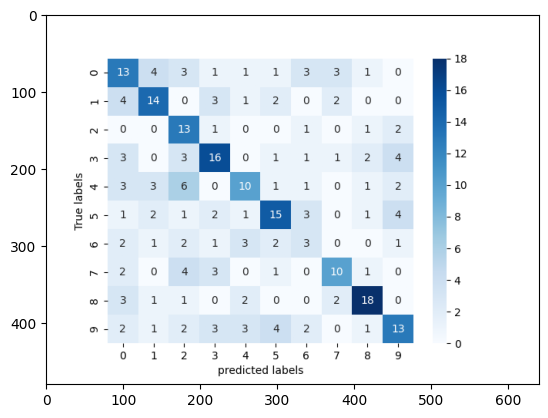

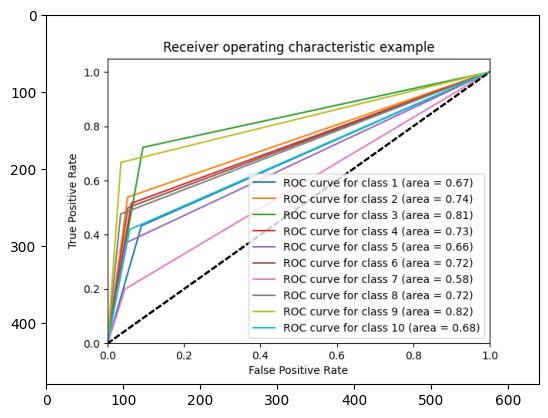

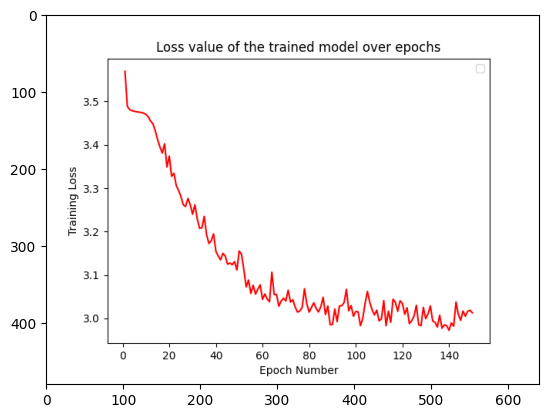

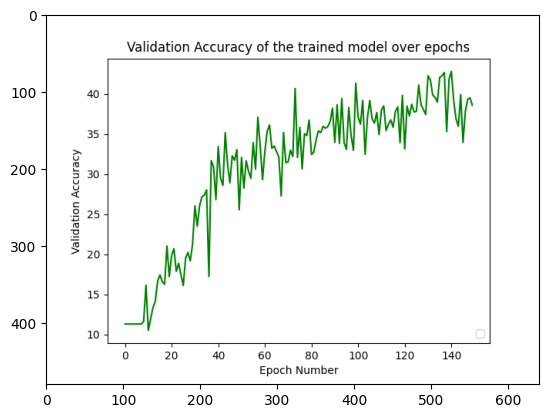

In [ ]:
CM = plt.imread("/content/Confusion_Matrix.png")
plt.figure()
plt.imshow(CM)

ROC = plt.imread("/content/ROC_AudioMNIST.png")
plt.figure()
plt.imshow(ROC)

loss = plt.imread("/content/Loss_AudioMNIST.png")
plt.figure()
plt.imshow(loss)

val_acc = plt.imread("/content/Val_Accuracy_AudioMNIST.png")
plt.figure()
plt.imshow(val_acc)


---
##***3-3) Transfer Learning Based on BackPropagation***

In [ ]:
from torch.nn.modules.linear import Linear
from tqdm import tqdm



class MNIST_Dataset(torch.utils.data.Dataset):
  def __init__(self, json_file, transform=None):
    self.json_file = open(json_file)
    self.dataset = json.load(self.json_file)
    print()
    self.transforms = transform


  def __len__(self):
    return len(self.dataset)


  def __getitem__(self, idx):
    audio, sampling_freq = torchaudio.load(self.dataset[list(self.dataset.keys())[idx]]['wav'])
    label = int(self.dataset[list(self.dataset.keys())[idx]]['digit'])

    lengths = []

    sig = audio[0,:]
    sig = torchaudio.functional.resample(sig, sampling_freq, 16000)

    if self.transforms:
      fbank = features.Fbank(n_mels=40)(sig.unsqueeze(dim=0))
      #fbank = (fbank + 83.26512145996094 ) / (20.686758041381836 + 83.26512145996094)
      mean_var_norm = normalization.InputNormalization(norm_type="global")
      lengths.append(sig.shape[0]/16000)
      fbank = mean_var_norm(fbank, torch.tensor(lengths))
      #print(waveform.shape)
      waveform = torchvision.transforms.Resize((224, 224))(fbank)
      #waveform = torch.cat((waveform, waveform, waveform), dim=0)

    return waveform, label


train_dataset = MNIST_Dataset("/content/train.json", transform=True)
test_dataset = MNIST_Dataset("/content/test.json", transform=True)
valid_dataset = MNIST_Dataset("/content/valid.json", transform=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

print(train_loader)
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
print(next(iter(train_loader))[0].shape)




device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNN(torch.nn.Module):
    def __init__(self, feature_extractor):
        super(CNN, self).__init__()
        self.feature_extractor = feature_extractor
        self.linear = torch.nn.Sequential(
           torch.nn.Linear(in_features=9216, out_features=2048),
           torch.nn.BatchNorm1d(num_features=2048),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=2048, out_features=512),
           torch.nn.BatchNorm1d(num_features=512),
           torch.nn.ReLU(),
           torch.nn.Linear(in_features=512, out_features=10)
        )

    def forward(self, x):
        out = self.feature_extractor(x)

        out = out.view(out.size(0), -1)
        out = self.linear(out)

        return out

alexnet = torchvision.models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False


cnn = CNN(alexnet.features)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001)
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, threshold=0.0001, patience=3)




def train_model(model, num_epoch, train_loader, valid_loader):
    best_accuracy = -np.inf
    for epoch in range(num_epoch):
        model.train()
        losses = []
        for i, (x_tr, y_tr) in tqdm(enumerate(train_loader)):
            x_tr = torch.cat([x_tr, x_tr, x_tr], dim=1)
            x_tr, y_tr = x_tr.to(device), y_tr.to(device)
            y_pred = model(x_tr)

            loss = loss_func(y_pred, y_tr)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1} ----- train loss: {np.sum(losses)}")

        model.eval()
        total_accuracy = 0
        for j, (x_val, y_val) in enumerate(valid_loader):
            x_val = torch.cat([x_val, x_val, x_val], dim=1)
            x_val, y_val = x_val.to(device), y_val.to(device)
            model_pred = model(x_val)
            y_pred = torch.max(model_pred, 1)[1].data.squeeze()
            accuracy = (y_pred == y_val).sum().item() / float(y_val.size(0))
            total_accuracy += accuracy

        before_lr = optimizer.param_groups[0]['lr']
        schedular.step(total_accuracy/len(valid_loader))
        after_lr = optimizer.param_groups[0]['lr']
        if before_lr == after_lr:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)}")
        else:
            print(f"Valid Accuracy of the model in Epoch {epoch+1} is: {total_accuracy/len(valid_loader)} ----- Learning Rate: {before_lr} --> {after_lr}")

        if total_accuracy > best_accuracy:
            print("Saving Best Model...")
            best_accuracy = total_accuracy
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_func
            }, "/content/saved_model.pth")
train_model(cnn.to(device), 10, train_loader, valid_loader)



loaded_model = torch.load("/content/saved_model.pth")
cnn.load_state_dict(loaded_model['model_state_dict'])
optimizer.load_state_dict(loaded_model['optimizer_state_dict'])

def test():
    # Test the model
    cnn.eval()
    cnn.to(device)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = torch.cat([images, images, images], dim=1)
            images, labels = images.to(device), labels.to(device)
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            total += accuracy
            pass

        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        print(f'Test Accuracy of the model on the test images: {total/len(test_loader)}')
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

    pass
test()




14
3
3
torch.Size([256, 1, 224, 224])


14it [00:15,  1.09s/it]


Epoch 1 ----- train loss: 19.411109030246735
Valid Accuracy of the model in Epoch 1 is: 0.0
Saving Best Model...


14it [00:14,  1.00s/it]


Epoch 2 ----- train loss: 14.100198537111282
Valid Accuracy of the model in Epoch 2 is: 0.48616206983805665
Saving Best Model...


14it [00:13,  1.01it/s]


Epoch 3 ----- train loss: 8.617315664887428
Valid Accuracy of the model in Epoch 3 is: 0.48616206983805665


14it [00:14,  1.01s/it]


Epoch 4 ----- train loss: 9.74937678873539
Valid Accuracy of the model in Epoch 4 is: 0.5151874578272605
Saving Best Model...


14it [00:14,  1.01s/it]


Epoch 5 ----- train loss: 11.348195657134056
Valid Accuracy of the model in Epoch 5 is: 0.5138379301619432


14it [00:13,  1.03it/s]


Epoch 6 ----- train loss: 10.967045813798904
Valid Accuracy of the model in Epoch 6 is: 0.5138379301619432


14it [00:13,  1.01it/s]


Epoch 7 ----- train loss: 10.690949972718954
Valid Accuracy of the model in Epoch 7 is: 0.5138379301619432


14it [00:14,  1.00s/it]


Epoch 8 ----- train loss: 10.460636761039495
Valid Accuracy of the model in Epoch 8 is: 0.5151874578272605 ----- Learning Rate: 0.0001 --> 5e-05


14it [00:13,  1.02it/s]


Epoch 9 ----- train loss: 8.274419285356998
Valid Accuracy of the model in Epoch 9 is: 0.5138379301619432


14it [00:13,  1.02it/s]


Epoch 10 ----- train loss: 8.067674430087209
Valid Accuracy of the model in Epoch 10 is: 0.5151874578272605
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Test Accuracy of the model on the test images: 0.503844246031746
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


---
##***3-4) Transfer Learning Based on Forward Forward Algorithm***

In [ ]:
import json
from tqdm import tqdm

def create_json(json_file, audiolist):
  json_dict = {}
  for audiofile in tqdm(audiolist):

    audioinfo = torchaudio.info(audiofile)

    duration = audioinfo.num_frames/audioinfo.sample_rate

    digit = label_encoded[audiofile.split("/")[-2]]

    uttid =  audiofile.split("/")[-1]

    json_dict[uttid] = {
            "wav": audiofile,
            "length": duration,
            "digit": str(digit),
    }

    with open(json_file, mode="w") as json_f:
        json.dump(json_dict, json_f, indent=2)



create_json('train.json', train_files)
create_json('valid.json', valid_files)
create_json('test.json', test_files)

100%|██████████| 5841/5841 [00:42<00:00, 136.87it/s]


In [ ]:
%%file Net.py
import torch
import torchvision


class AlexNet(torch.nn.Module):
    def __init__(self, training = True):
        super().__init__()
        self.model = torchvision.models.alexnet(training)
        for param in self.model.parameters():
            param.requires_grad = False
        """layers = list(self.model.children())
        self.feature_extractor = torch.nn.Sequential(*layers[:-1])"""
        self.feature_extractor = self.model.features

    def forward(self, x):
        return self.feature_extractor(x)





class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, dropout=0.0, bias=True, device=None, dtype=None):
        super().__init__()
        layers = []
        layers.append(torch.nn.Linear(in_features, out_features))
        #layers.append(torch.nn.BatchNorm1d(out_features))
        layers.append(torch.nn.ReLU())


        self.mlp = torch.nn.Sequential(*layers[:]).to(device)

        self.opt = torch.optim.Adam(self.mlp.parameters(), lr=0.05)
        self.threshold = 3.5



    def forward(self, x):
      x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
      return self.mlp(x_direction)


    def train_model(self, x_pos, x_neg):

        g_pos = self.forward(x_pos).pow(2).mean(1)
        g_neg = self.forward(x_neg).pow(2).mean(1)
        # The following loss pushes pos (neg) samples to
        # values larger (smaller) than the self.threshold.
        loss = torch.log(1 + torch.exp(torch.cat([
            -g_pos + self.threshold,
            g_neg - self.threshold]))).mean()
        self.opt.zero_grad()
        # this backward just compute the derivative and hence
        # is not considered backpropagation.
        loss.backward()
        self.opt.step()

        return self.forward(x_pos).detach(), self.forward(x_neg).detach(), loss.item()


Writing Net.py


In [ ]:
%%file hparams_ForwardForward.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mohammad Mahdi Moradi 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/AudioMNIST/CRNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 40

## Threshold for Energy computation of loss function
threshold: 3

# Training Parameters
input_channels: 1
sample_rate: 16000
number_of_epochs: 200
batch_size: 256
lr_start: 0.001
lr_final: 0.0001
n_classes: 10 # In this case, we have 10 digits
emb_dim: 128 # dimensionality of the embeddings
dataloader_options:
    batch_size: !ref <batch_size>

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Pre Trained Model (AlexNet)
#pre_trained_model: !new:Net.pre_trained_model
pre_trained_model: !new:Net.AlexNet
    training: True


# Clasifier applied on top of the embeddings
Linear1: !new:Net.Linear
    in_features: 9226
    out_features: 2048

Linear2: !new:Net.Linear
    in_features: 2048
    out_features: 512

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    pre_trained_model: !ref <pre_trained_model>
    Linear1: !ref <Linear1>
    Linear2: !ref <Linear2>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        pre_trained_model: !ref <pre_trained_model>
        Linear1: !ref <Linear1>
        Linear2: !ref <Linear2>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_ForwardForward.yaml


In [ ]:
%%file train.py
import numpy as np
import torchvision


#!/usr/bin/env python3
"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class DigitBrain(sb.Brain):

    #6
    def compute_forward(self, batch, stage):
        batch = batch.to(self.device)
        wavs, lens = batch.sig
        y, _ = batch.digit_encoded
        y = y.squeeze()



        ## Extracting FBANK features
        wavs = self.modules.compute_features(wavs)

        ## Normalizing
        wavs = self.modules.mean_var_norm(wavs, lens)

        ## Resizing
        wavs = torchvision.transforms.Resize((225, 225))(wavs)
        wavs = wavs.unsqueeze(1)
        wavs = torch.cat([wavs, wavs, wavs], dim=1)

        # Your code here. Aim for 7-8 lines
        if stage == sb.Stage.TRAIN:

            ## Pre Trained Model
            h = self.modules.pre_trained_model(wavs)
            h = h.view((h.shape[0], -1))

            ## Flatteing the output of Convolutional Layer
            rnd = torch.randperm(h.size(0))
            y_neg = y[rnd]
            max, index = torch.max(h, dim=1)

            x1 = max * torch.nn.functional.one_hot(y, num_classes=self.hparams.n_classes).to(self.device).T
            x2 = max * torch.nn.functional.one_hot(y_neg, num_classes=self.hparams.n_classes).to(self.device).T

            h_pos = torch.cat([h, x1.T], dim=1)
            h_neg = torch.cat([h, x2.T], dim=1)

            ## Lieanr Layers
            h_pos, h_neg, loss4 = self.modules.Linear1.train_model(h_pos, h_neg)
            h_pos, h_neg, loss5 = self.modules.Linear2.train_model(h_pos, h_neg)

            return (loss4, loss5)

        if stage != sb.Stage.TRAIN:
            x = wavs
            goodness_per_label = []
            for label in range(self.hparams.n_classes):
                goodness = []
                h = self.modules.pre_trained_model(x)
                h = h.view((h.shape[0], -1))

                max, index = torch.max(h, dim=1)
                h1 = max * torch.nn.functional.one_hot(torch.tensor([label]*h.shape[0]), num_classes=self.hparams.n_classes).to(self.device).T
                h = torch.cat([h, h1.T], dim=1)


                h = self.modules.Linear1.forward(h)
                goodness += [h.pow(2).mean(1)]
                h = self.modules.Linear2.forward(h)
                goodness += [h.pow(2).mean(1)]

                goodness_per_label += [sum(goodness).unsqueeze(1)]
            goodness_per_label = torch.cat(goodness_per_label, 1)

            if (stage == sb.Stage.TEST):
                self.y_test_true.append(y)
                self.y_test_pred.append(goodness_per_label.argmax(1))
            return goodness_per_label.argmax(1)





    def compute_objectives(self, outputs, batch, stage):
        _, lens = batch.sig
        digit, _ = batch.digit_encoded
        digit = digit.squeeze()
        if stage == sb.Stage.TRAIN:
            (loss4, loss5) = outputs

            return loss4 + loss5

        if stage != sb.Stage.TRAIN:
          return outputs.eq(digit.to(self.device)).float().mean().item()


    def loss_function(self, x_pos, x_neg, threshold):
        return torch.log(1 + torch.exp(torch.cat([-x_pos + threshold, x_neg - threshold]))).mean()

    #5
    def fit_batch(self, batch):
        losses = self.compute_forward(batch, sb.Stage.TRAIN)

        loss = self.compute_objectives(losses, batch, sb.Stage.TRAIN)
        loss = torch.tensor(loss)

        return loss.detach()


    def evaluate_batch(self, batch, stage=sb.Stage.TEST):
        if (stage == sb.Stage.VALID):
            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)

        elif (stage == sb.Stage.TEST):
            if self.load_model_flag == True and os.path.exists("/content/best_model.pth"):
                  self.load()
                  print("\n$$$$$$$$$$ Loading Best Model $$$$$$$$$$")
                  self.load_model_flag = False

            outputs = self.compute_forward(batch, stage)
            loss = self.compute_objectives(outputs, batch, stage)
            self.accuracy += loss
            loss = torch.tensor(loss)


        return loss.detach()

    #2
    def on_fit_start(self):
        self.last_epoch = 0
        self.last_batch = None
        self.last_loss_stats = {}

        self.schedular1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear1.opt, mode='min', factor=0.5, patience=15, threshold=0.0001)
        self.schedular2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.modules.Linear2.opt, mode='min', factor=0.5, patience=15, threshold=0.0001)
        self.best_loss = -np.inf

        self.train_losses = []
        self.valid_accuracy = []

        self.y_test_true = []
        self.y_test_pred = []
        self.load_model_flag = True
        return super().on_fit_start()

    #4
    def on_stage_start(self, stage, epoch=None):
        self.accuracy = 0



        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()



    def on_stage_end(self, stage, stage_loss, epoch=None):
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
            self.train_losses.append(stage_loss)

        elif stage == sb.Stage.VALID:
            stats = {
                "Accuracy": (self.accuracy/5)*100,
            }
            self.valid_accuracy.append((self.accuracy/5)*100)



        if stage == sb.Stage.VALID:
            if (self.best_loss < stage_loss):
              print("\n@@@@@@@@@@ Savaing Best Model @@@@@@@@@@")
              self.best_loss = stage_loss
              self.save('/content/best_model.pth')

            old_lr = self.modules.Linear1.opt.param_groups[0]["lr"]
            """self.schedular1.step(self.accuracy)
            self.schedular2.step(self.accuracy)"""
            new_lr = self.modules.Linear1.opt.param_groups[0]["lr"]



            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            #self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])


        if stage == sb.Stage.TEST:
            y_true = list(self.y_test_true[0].cpu().numpy())
            y_hat = list(self.y_test_pred[0].cpu().numpy())

            y_true2 = torch.nn.functional.one_hot(torch.tensor(y_true), num_classes=self.hparams.n_classes)
            self.y_true_ndarray = y_true2.numpy()
            y_hat2 = torch.nn.functional.one_hot(torch.tensor(y_hat), num_classes=self.hparams.n_classes)
            self.y_hat_ndarray = y_hat2.numpy()

            stats_test = {
                "Accuracy": (self.accuracy/5)*100,
                "Recall": (recall_score(y_true, y_hat, average="macro") * 100),
                "Precision": (precision_score(y_true, y_hat, average="macro") * 100),
                "F1-Score": (f1_score(y_true, y_hat, average="macro") * 100),
            }


            self.CM = confusion_matrix(y_true, y_hat)


            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats_test,
            )


    def save(self, epoch, path='/content/best_model.pth'):
      model_params = {}
      optimizer_params = {}

      model_params["fc_layer1"] = self.modules.Linear1.state_dict()
      model_params["fc_layer2"] = self.modules.Linear2.state_dict()
      optimizer_params["fc_layer1"] = self.modules.Linear1.opt.state_dict()
      optimizer_params["fc_layer2"] = self.modules.Linear2.opt.state_dict()

      torch.save({
            "model_params": model_params,
            "optimizer_params": optimizer_params
        }, path)


    def load(self, path="/content/best_model.pth"):
      loaded_model = torch.load(path)
      model_params = loaded_model["model_params"]
      optimizer_params = loaded_model["optimizer_params"]

      self.modules.Linear1.load_state_dict(model_params["fc_layer1"])
      self.modules.Linear2.load_state_dict(model_params["fc_layer2"])

      self.modules.Linear1.opt.load_state_dict(optimizer_params["fc_layer1"])
      self.modules.Linear2.opt.load_state_dict(optimizer_params["fc_layer2"])


    #7
    def overlay_y_on_x(self, x, y):
        x_ = torch.zeros((x.shape[0], x.shape[1], x.shape[2], x.shape[3]))
        for i in range(x.shape[0]):
          mat = np.array(x[i,0,:,:].cpu())
          mat[0,0] = mat.min()
          if (y[i] == 0):
            mat[0,0] = mat.max()

          mat[1,0] = mat.min()
          if (y[i] == 1):
            mat[1,0] = mat.max()

          mat[2,0] = mat.min()
          if (y[i] == 2):
            mat[2,0] = mat.max()

          mat[0,1] = mat.min()
          if (y[i] == 3):
            mat[0,1] = mat.max()

          mat[1,1] = mat.min()
          if (y[i] == 4):
            mat[1,1] = mat.max()

          mat[2,1] = mat.min()
          if (y[i] == 5):
            mat[2,1] = mat.max()

          mat[0,2] = mat.min()
          if (y[i] == 6):
            mat[0,2] = mat.max()

          mat[1,2] = mat.min()
          if (y[i] == 7):
            mat[1,2] = mat.max()

          mat[2,2] = mat.min()
          if (y[i] == 8):
            mat[2,2] = mat.max()

          mat[0,3] = mat.min()
          if (y[i] == 9):
            mat[0,3] = mat.max()

          x_[i, 0, :, :]= torch.tensor(mat)
        return x_

# 1
def dataio_prep(hparams):
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):

        sig, fs = torchaudio.load(wav)

        sig = sig[0,:]
        sig = torchaudio.functional.resample(sig, fs, 16000)

        return sig


    @sb.utils.data_pipeline.takes("digit")
    @sb.utils.data_pipeline.provides("digit", "digit_encoded")
    def label_pipeline(digit):

        yield digit
        digit_encoded = label_encoder.encode_label_torch(digit)
        yield digit_encoded


    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }

    hparams["dataloader_options"]["shuffle"] = True

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "digit_encoded"],
        )


    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="digit",
    )

    return datasets



if __name__ == "__main__":

    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)

    digit_brain = DigitBrain(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )


    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    print("///////////////////////////////////////////////////////////////////")
    test_stats = digit_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )



    ##### Plotting training loss and Validation Accuracy
    plt.figure()
    epoches = [i+1 for i in range(hparams['number_of_epochs'])]
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.title('Loss value of the trained model over epochs')
    plt.legend(loc="upper right")
    plt.plot(epoches, digit_brain.train_losses, 'r')
    plt.savefig("/content/Loss_AudioMNIST.png")

    plt.figure()
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy of the trained model over epochs')
    plt.legend(loc="lower right")
    plt.plot(digit_brain.valid_accuracy, 'g')
    plt.savefig("/content/Val_Accuracy_AudioMNIST.png")

    ##### Plotting Confusion Matrix
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(digit_brain.CM, annot=True ,ax=ax, fmt='d', cmap=plt.cm.Blues)

    ax.set_xlabel('predicted labels')
    ax.set_ylabel('True labels')
    plt.savefig("/content/Confusion_Matrix.png")
    ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.show()


    ##### PLotting ROC curve and the AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(hparams["n_classes"]):
        fpr[i], tpr[i], _ = roc_curve(digit_brain.y_true_ndarray[:, i], digit_brain.y_hat_ndarray[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(hparams["n_classes"]):
        plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f"/content/ROC_AudioMNIST.png")

Writing train.py


In [ ]:
!rm -rf ./content/results/AudioMNIST/CRNN/1986
!python train.py hparams_ForwardForward.yaml

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/AudioMNIST/CRNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 19.9M trainable parameters in DigitBrain
spee

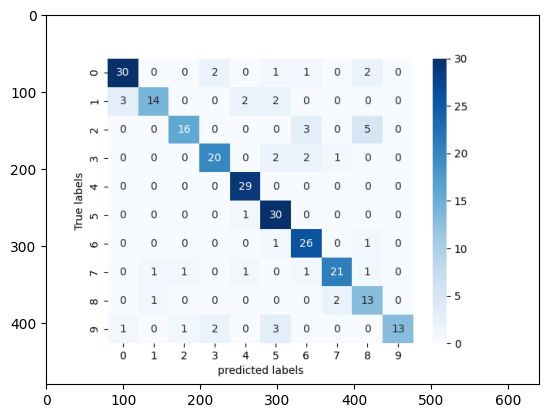

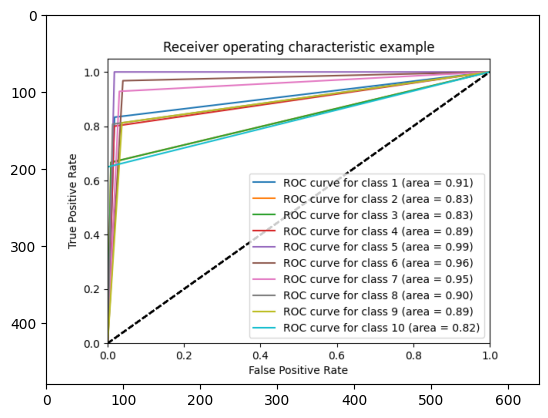

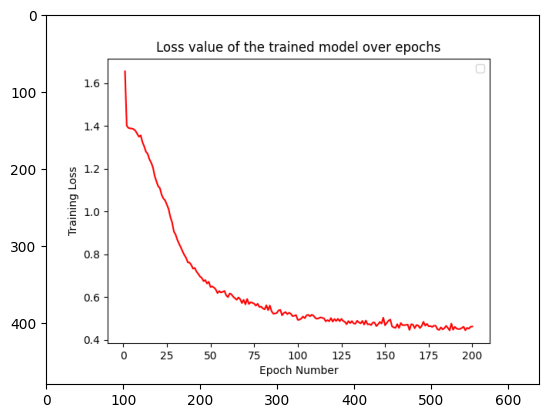

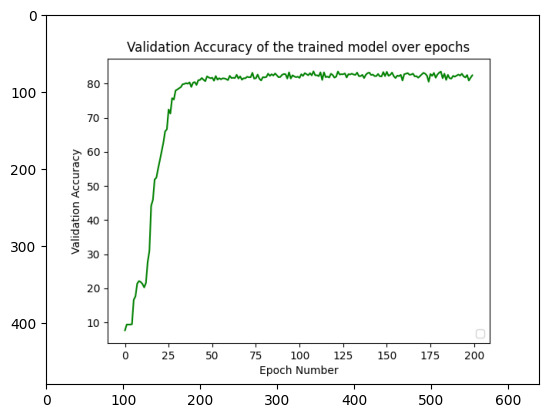

In [ ]:
CM = plt.imread("/content/Confusion_Matrix.png")
plt.figure()
plt.imshow(CM)

ROC = plt.imread("/content/ROC_AudioMNIST.png")
plt.figure()
plt.imshow(ROC)

loss = plt.imread("/content/Loss_AudioMNIST.png")
plt.figure()
plt.imshow(loss)

val_acc = plt.imread("/content/Val_Accuracy_AudioMNIST.png")
plt.figure()
plt.imshow(val_acc)


#**-----------------------------------------------------------------------**
##**4) Conclusion**
#**-----------------------------------------------------------------------**

In this project different deep learning models and speech datasets were investigated and what you see here are the best resutls. For example, I tried other networks like CRDNN, Locally Connected Layers, and RNN based models, but I could not get any good results by them. But What I got realized in this project was that Forward-Forward algorithm is so sensitive to the the values of hyperparameters and the architecture of the model to the way that, if could find the best ones, you could achieve outstanding results. I feel like If i had access to the servers like "Compute Canada" and python modules like "**WandB**" I could present even more outstanding results with more database.